<a href="https://colab.research.google.com/github/HazelvdW/context-framed-listening/blob/main/framed_listening_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Framed Listening: **TF-IDF analyses**
> By **Hazel A. van der Walle** (PhD student, Music, Durham University), September 2025.

This notebook analyses semantic similarity between music-evoked thought (MET)
descriptions at the aggregated document level to answer: "Does context cue
influence METs more than the music itself?"

Analysis approach:
- Works with aggregated documents (called "METdocs") ONLY
  - TF-IDF is a bag-of-words method optimised for document-level analysis with
    sufficient word overlap. Individual short texts (10-50 words) produce extremely
    sparse vectors with minimal lexical overlap, resulting in artificially low
    similarity values that do not reflect semantic relationships.
  - BERT and Word2Vec handle individual-level analysis as they capture semantic
    meaning beyond exact word matches.
- Aggregates all thoughts from each clip-context pair into documents (N=64)
- Calculates pairwise cosine similarities between METdocs
- Categorises document pairs by their stimuli conditions to compare similarity distributions
- Tests whether aggregated thoughts are more similar when sharing music vs sharing context

Key comparisons:
1. Same clip + different context VS Different clip + same context
   → Does music or context drive thought similarity at the document level?
2. Within vs between genre/context/clip conditions
   → What factors influence semantic coherence in aggregated METs?

Note: This document-level analysis complements the individual-level analyses
conducted with BERT and Word2Vec, providing a lexical perspective on semantic patterns.

---

All datasets generated and used for this study are openly available on GitHub https://github.com/HazelvdW/context-framed-listening.

In [1]:
!rm -r context-framed-listening
# Clone the GitHub repository
!git clone https://github.com/HazelvdW/context-framed-listening.git

Cloning into 'context-framed-listening'...
remote: Enumerating objects: 432, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 432 (delta 1), reused 0 (delta 0), pack-reused 424 (from 2)
Receiving objects: 100% (432/432), 216.60 MiB | 19.94 MiB/s, done.
Resolving deltas: 100% (192/192), done.
Updating files: 100% (79/79), done.


Refresh files to see **"context-framed-listening"**.


---

## Setup

In [2]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

---
## ANALYSIS AT COMBINED METdoc LEVEL

TF-IDF (Term Frequency-Inverse Document Frequency) is a bag-of-words approach
that weights words by their importance within documents relative to a corpus.
This method is optimized for document-level analysis where texts are long enough
to contain sufficient word overlap for meaningful similarity comparisons.

Analysis structure:
- Aggregates all thoughts from each clip-context pair into documents (N=64)
- Each METdoc represents the collective semantic profile of one experimental condition
- Compares documents using cosine similarity of TF-IDF vectors
- Uses identical condition categories as BERT and Word2Vec for cross-method comparison

Purpose: Examine lexical similarity patterns at the aggregated level
- Shows which condition pairs share similar vocabulary and word usage patterns
- Complements semantic similarity analyses from BERT and Word2Vec
- Useful for understanding document-level semantic profiles


Load in the data file "**METdocsLVL2.csv**" that contains the preprocessed text data of participants' thought desciptions grouped into "METdocs", generated using the code notebook titled [framed_listening_text_prep](https://github.com/HazelvdW/context-framed-listening/blob/main/framed_listening_text_prep.ipynb)

In [3]:
# Load TF-IDF-appropriate aggregated METdocs
print("Loading aggregated METdocs...")
METdocs = pd.read_csv('/content/context-framed-listening/NLP_outputs/METdocsLVL2.csv')
text_column = 'METdescr_prepLVL2'

print(f"Total METdocs (clip-context pairs): {len(METdocs)}")
print(f"Unique clips: {METdocs['clip_name'].nunique()}")
print(f"Unique contexts: {METdocs['context_word'].nunique()}")

Loading aggregated METdocs...
Total METdocs (clip-context pairs): 64
Unique clips: 16
Unique contexts: 4


### TF-IDF Vectorisation

In [4]:
print("\nComputing TF-IDF vectors for aggregated METdocs...")

# Initialise TF-IDF vectorizer
tfidf_vectorizer_docs = TfidfVectorizer(sublinear_tf=False)

# Fit and transform METdocs
tfidf_matrix_docs = tfidf_vectorizer_docs.fit_transform(METdocs[text_column].astype(str))

print(f"TF-IDF matrix shape: {tfidf_matrix_docs.shape}")
print(f"Number of unique terms: {len(tfidf_vectorizer_docs.get_feature_names_out())}")

# Save TF-IDF scores for METdocs
df_TFIDF_docs = pd.DataFrame(
    tfidf_matrix_docs.toarray(),
    columns=tfidf_vectorizer_docs.get_feature_names_out(),
    index=METdocs['ClipContext_pair']
)
df_TFIDF_docs.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_TFIDF_scores.csv',
                      encoding='utf-8')


Computing TF-IDF vectors for aggregated METdocs...
TF-IDF matrix shape: (64, 3325)
Number of unique terms: 3325


### Cosine Similarity Matrix


Calculating cosine similarity matrix...

TF-IDF Cosine Similarity Matrix (METdocs level):


ClipContext_pair,BAR-80s_LOW_02,BAR-80s_LOW_06,BAR-80s_MED_08,BAR-80s_MED_13,BAR-Ele_LOW_09,BAR-Ele_LOW_14,BAR-Ele_MED_19,BAR-Ele_MED_20,BAR-Jaz_LOW_19,BAR-Jaz_LOW_21,...,VIDEOGAME-Ele_MED_19,VIDEOGAME-Ele_MED_20,VIDEOGAME-Jaz_LOW_19,VIDEOGAME-Jaz_LOW_21,VIDEOGAME-Jaz_MED_02,VIDEOGAME-Jaz_MED_07,VIDEOGAME-Met_LOW_09,VIDEOGAME-Met_LOW_14,VIDEOGAME-Met_MED_19,VIDEOGAME-Met_MED_20
ClipContext_pair,,,,,,,,,,,,,,,,,,,,,
BAR-80s_LOW_02,1.000000,0.341980,0.358179,0.358328,0.344184,0.345180,0.408953,0.340433,0.321841,0.359571,...,0.392228,0.346242,0.286943,0.334202,0.380768,0.437105,0.332314,0.267711,0.310773,0.310947
BAR-80s_LOW_06,0.341980,1.000000,0.426238,0.335442,0.355636,0.407451,0.313701,0.325606,0.336328,0.440361,...,0.298549,0.266112,0.287858,0.286771,0.371370,0.391684,0.296229,0.230518,0.260956,0.274753
BAR-80s_MED_08,0.358179,0.426238,1.000000,0.424640,0.387232,0.445359,0.362594,0.360172,0.401012,0.452967,...,0.387771,0.315025,0.333351,0.403461,0.407920,0.394449,0.358442,0.303518,0.344153,0.332642
BAR-80s_MED_13,0.358328,0.335442,0.424640,1.000000,0.376855,0.370450,0.375945,0.321061,0.410123,0.362957,...,0.386010,0.357943,0.376403,0.361567,0.383822,0.385968,0.368329,0.287007,0.340189,0.336044
BAR-Ele_LOW_09,0.344184,0.355636,0.387232,0.376855,1.000000,0.413536,0.368102,0.331279,0.354978,0.395798,...,0.354968,0.334759,0.351387,0.348050,0.348303,0.333701,0.376711,0.329743,0.387856,0.355314


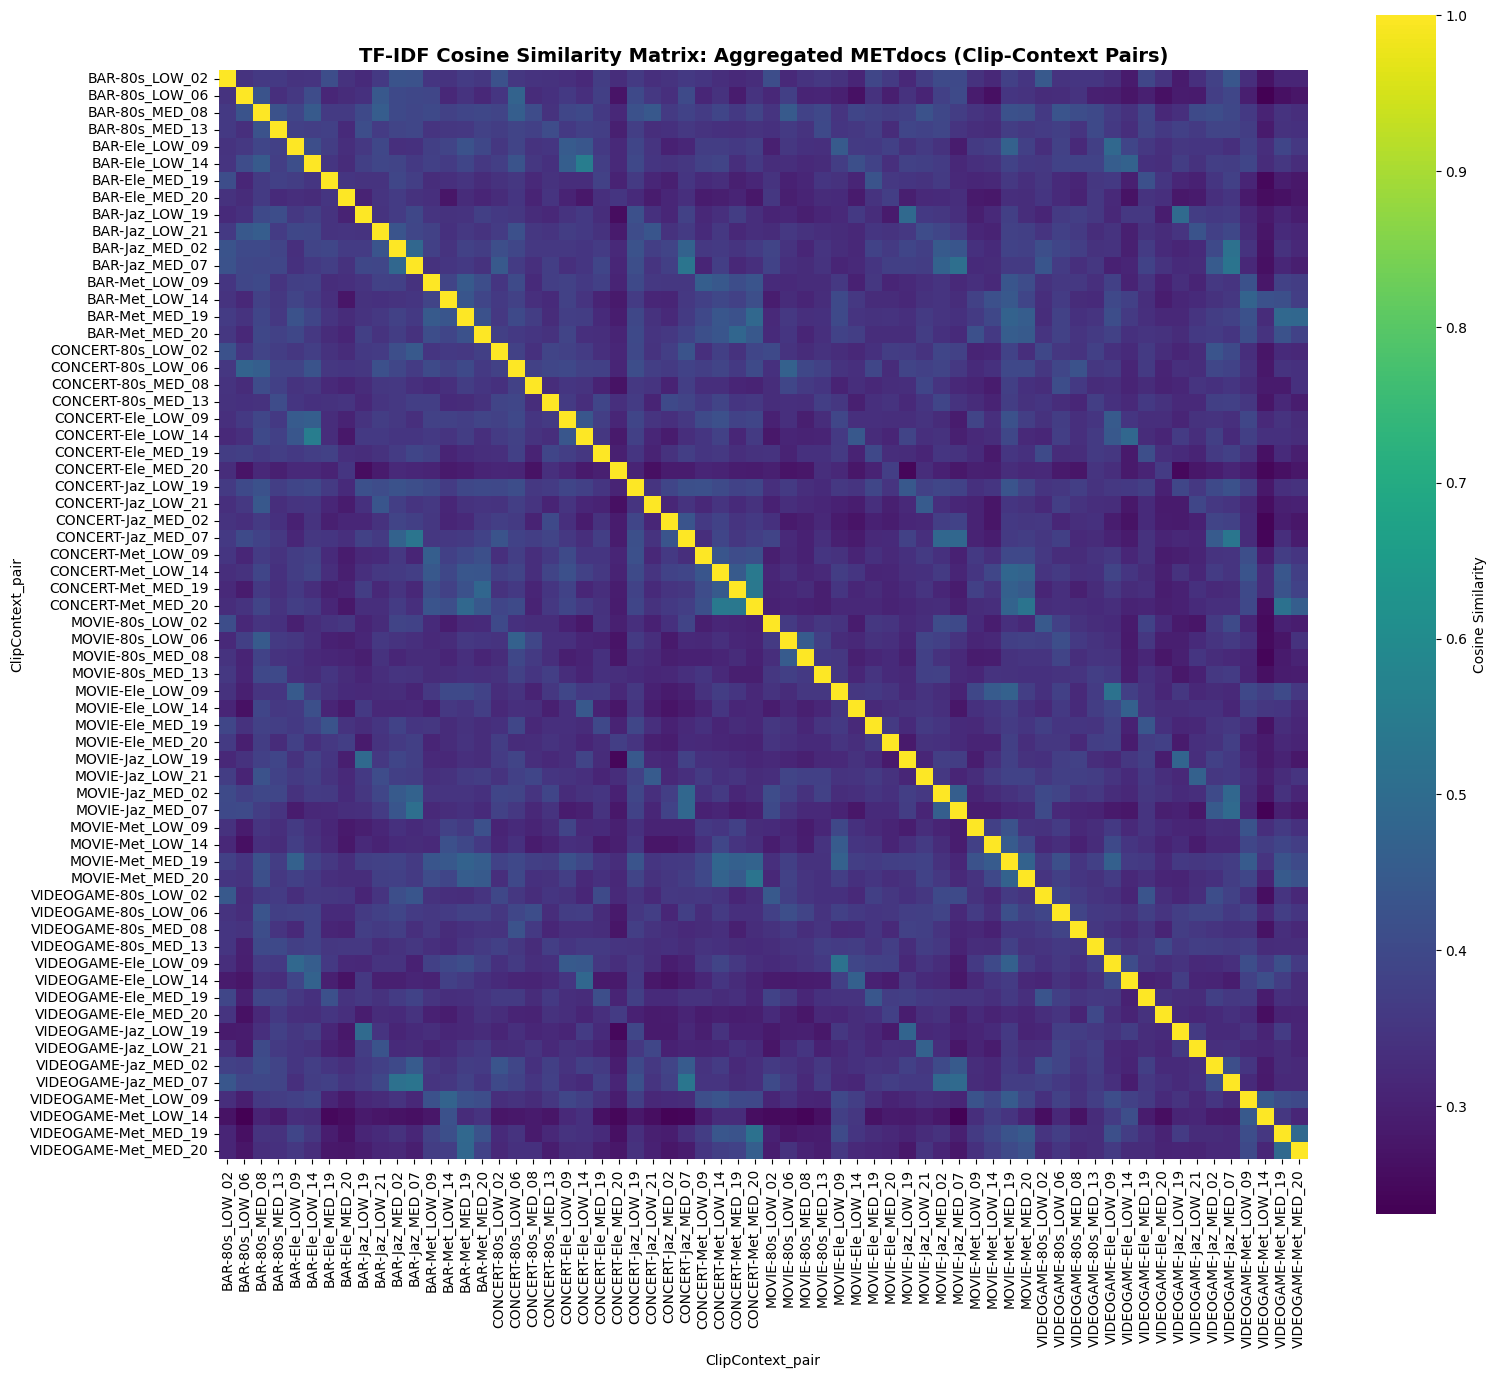

In [5]:
print("\nCalculating cosine similarity matrix...")
cosineMatrix_TFIDF = cosine_similarity(tfidf_matrix_docs, tfidf_matrix_docs)

# Create labeled DataFrame
cosineMatrix_TFIDF_df = pd.DataFrame(
    cosineMatrix_TFIDF,
    index=METdocs['ClipContext_pair'],
    columns=METdocs['ClipContext_pair']
)

# Save cosine similarity matrix
cosineMatrix_TFIDF_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_cosineMatrix_TFIDF.csv',
                               encoding='utf-8')

print("\nTF-IDF Cosine Similarity Matrix (METdocs level):")
display(cosineMatrix_TFIDF_df.head())

plt.figure(figsize=(16, 14))
sns.heatmap(cosineMatrix_TFIDF_df, cmap='viridis', annot=False, square=True,
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('TF-IDF Cosine Similarity Matrix: Aggregated METdocs (Clip-Context Pairs)',
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_heatmap_TFIDF.png',
            dpi=300, bbox_inches='tight')
plt.show()

### Similarity Values by Condition

In [6]:
print("\nExtracting similarity values by condition...")

clips = METdocs['clip_name'].values
contexts = METdocs['context_word'].values
genres = METdocs['genre_code'].values

similarity_data = {
    'doc_i': [],
    'doc_j': [],
    'similarity': [],
    'same_clip': [],
    'same_context': [],
    'same_genre': [],
    'condition': []
}

n_docs = len(METdocs)
print(f"Processing {(n_docs * (n_docs - 1)) // 2} unique document pairs...")

for i in range(n_docs):
    if (i + 1) % 10 == 0:
        print(f"  Processed {i + 1}/{n_docs} documents...")

    for j in range(i + 1, n_docs):
        sim_value = cosineMatrix_TFIDF[i, j]

        same_clip = clips[i] == clips[j]
        same_context = contexts[i] == contexts[j]
        same_genre = genres[i] == genres[j]

        # DETAILED CONDITIONS (for specific comparisons)
        if same_clip and same_context:
            condition = 'same_clip_same_context'
        elif same_clip and not same_context:
            condition = 'same_clip_diff_context'  # MUSIC influence
        elif not same_clip and same_context:
            condition = 'diff_clip_same_context'  # CONTEXT influence
        elif not same_clip and not same_context:
            if same_genre:
                condition = 'diff_clip_diff_context_same_genre'
            else:
                condition = 'diff_clip_diff_context_diff_genre'
        else:
            condition = 'other'  # shouldn't happen but safeguard

        similarity_data['doc_i'].append(i)
        similarity_data['doc_j'].append(j)
        similarity_data['similarity'].append(sim_value)
        similarity_data['same_clip'].append(same_clip)
        similarity_data['same_context'].append(same_context)
        similarity_data['same_genre'].append(same_genre)
        similarity_data['condition'].append(condition)

sim_df_docs = pd.DataFrame(similarity_data)
sim_df_docs.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_similarity_by_condition_TFIDF.csv',
                    index=False)

print("\nMETdocs-level similarity measures extracted:")
print(sim_df_docs.groupby('condition')['similarity'].agg(['count', 'mean', 'std', 'min', 'max']))



Extracting similarity values by condition...
Processing 2016 unique document pairs...
  Processed 10/64 documents...
  Processed 20/64 documents...
  Processed 30/64 documents...
  Processed 40/64 documents...
  Processed 50/64 documents...
  Processed 60/64 documents...

METdocs-level similarity measures extracted:
                                   count      mean       std       min  \
condition                                                                
diff_clip_diff_context_diff_genre   1152  0.335158  0.033651  0.230518   
diff_clip_diff_context_same_genre    288  0.363182  0.048555  0.257666   
diff_clip_same_context               480  0.354024  0.040283  0.259544   
same_clip_diff_context                96  0.422625  0.050381  0.326656   

                                        max  
condition                                    
diff_clip_diff_context_diff_genre  0.465631  
diff_clip_diff_context_same_genre  0.518031  
diff_clip_same_context             0.540833  
same_c

### STATISTICAL COMPARISONS



In [7]:
def compare_conditions(df, cond1, cond2, label1, label2):
    """Compare two specific conditions with t-test and effect size."""
    data1 = df[df['condition'] == cond1]['similarity']
    data2 = df[df['condition'] == cond2]['similarity']

    t_stat, p_value = stats.ttest_ind(data1, data2)
    pooled_std = np.sqrt((data1.std()**2 + data2.std()**2) / 2)
    effect_size = (data1.mean() - data2.mean()) / pooled_std

    if p_value < 0.001:
        sig_str = "***"
    elif p_value < 0.01:
        sig_str = "**"
    elif p_value < 0.05:
        sig_str = "*"
    else:
        sig_str = "n.s."

    return {
        'comparison': f"{label1} vs {label2}",
        'mean1': data1.mean(),
        'mean2': data2.mean(),
        'diff': data1.mean() - data2.mean(),
        't': t_stat,
        'p': p_value,
        'sig': sig_str,
        'd': effect_size,
        'n1': len(data1),
        'n2': len(data2)
    }


def compare_binary(df, column, label):
    """Compare same vs different for a binary factor."""
    same_data = df[df[column] == True]['similarity']
    diff_data = df[df[column] == False]['similarity']

    t_stat, p_value = stats.ttest_ind(same_data, diff_data)
    pooled_std = np.sqrt((same_data.std()**2 + diff_data.std()**2) / 2)
    effect_size = (same_data.mean() - diff_data.mean()) / pooled_std

    if p_value < 0.001:
        sig_str = "***"
    elif p_value < 0.01:
        sig_str = "**"
    elif p_value < 0.05:
        sig_str = "*"
    else:
        sig_str = "n.s."

    return {
        'comparison': f"Same {label} vs Different {label}",
        'mean_same': same_data.mean(),
        'mean_diff': diff_data.mean(),
        'diff': same_data.mean() - diff_data.mean(),
        't': t_stat,
        'p': p_value,
        'sig': sig_str,
        'd': effect_size,
        'n_same': len(same_data),
        'n_diff': len(diff_data)
    }

# Store results
binary_comparisons = []
combined_comparisons = []

#### Binary Comparisons (Same vs Different for each factor)
Testing whether sharing a factor (clip/context/genre) increases similarity
1. CLIP EFFECT: Same vs Different
2. CONTEXT EFFECT: Same vs Different
3. GENRE EFFECT: Same vs Different
4. KEY COMPARISON: Which factor matters most?



In [8]:
print("\n" + "-"*70)
print("BINARY COMPARISONS - Fundamental Effects")
print("-"*70)
print("Testing whether sharing a factor (clip/context/genre) increases similarity")

# 1. CLIP EFFECT: Same vs Different
print("\n1. CLIP EFFECT: Same Clip vs Different Clip")
print("-" * 70)
clip_comp = compare_binary(sim_df_docs, 'same_clip', 'Clip')
binary_comparisons.append(clip_comp)

print(f"Same clip: M={clip_comp['mean_same']:.4f}, SD={sim_df_docs[sim_df_docs['same_clip']]['similarity'].std():.4f} (N={clip_comp['n_same']})")
print(f"Different clip: M={clip_comp['mean_diff']:.4f}, SD={sim_df_docs[~sim_df_docs['same_clip']]['similarity'].std():.4f} (N={clip_comp['n_diff']})")
print(f"Difference: {clip_comp['diff']:.4f}")
print(f"t({clip_comp['n_same'] + clip_comp['n_diff'] - 2}) = {clip_comp['t']:.3f}, p = {clip_comp['p']:.4f} {clip_comp['sig']}")
print(f"Cohen's d = {clip_comp['d']:.3f}")

if clip_comp['mean_same'] > clip_comp['mean_diff']:
    print("→ Sharing the same CLIP significantly increases similarity")
else:
    print("→ Same clip does NOT significantly increase similarity")


# 2. CONTEXT EFFECT: Same vs Different
print("\n\n2. CONTEXT EFFECT: Same Context vs Different Context")
print("-" * 70)
context_comp = compare_binary(sim_df_docs, 'same_context', 'Context')
binary_comparisons.append(context_comp)

print(f"Same context: M={context_comp['mean_same']:.4f}, SD={sim_df_docs[sim_df_docs['same_context']]['similarity'].std():.4f} (N={context_comp['n_same']})")
print(f"Different context: M={context_comp['mean_diff']:.4f}, SD={sim_df_docs[~sim_df_docs['same_context']]['similarity'].std():.4f} (N={context_comp['n_diff']})")
print(f"Difference: {context_comp['diff']:.4f}")
print(f"t({context_comp['n_same'] + context_comp['n_diff'] - 2}) = {context_comp['t']:.3f}, p = {context_comp['p']:.4f} {context_comp['sig']}")
print(f"Cohen's d = {context_comp['d']:.3f}")

if context_comp['mean_same'] > context_comp['mean_diff']:
    print("→ Sharing the same CONTEXT significantly increases similarity")
else:
    print("→ Same context does NOT significantly increase similarity")


# 3. GENRE EFFECT: Same vs Different
print("\n\n3. GENRE EFFECT: Same Genre vs Different Genre")
print("-" * 70)
genre_comp = compare_binary(sim_df_docs, 'same_genre', 'Genre')
binary_comparisons.append(genre_comp)

print(f"Same genre: M={genre_comp['mean_same']:.4f}, SD={sim_df_docs[sim_df_docs['same_genre']]['similarity'].std():.4f} (N={genre_comp['n_same']})")
print(f"Different genre: M={genre_comp['mean_diff']:.4f}, SD={sim_df_docs[~sim_df_docs['same_genre']]['similarity'].std():.4f} (N={genre_comp['n_diff']})")
print(f"Difference: {genre_comp['diff']:.4f}")
print(f"t({genre_comp['n_same'] + genre_comp['n_diff'] - 2}) = {genre_comp['t']:.3f}, p = {genre_comp['p']:.4f} {genre_comp['sig']}")
print(f"Cohen's d = {genre_comp['d']:.3f}")

if genre_comp['mean_same'] > genre_comp['mean_diff']:
    print("→ Sharing the same GENRE significantly increases similarity")
else:
    print("→ Same genre does NOT significantly increase similarity")


# KEY COMPARISON: Which factor matters most?
print("\n\n" + "="*70)
print("KEY FINDING: Comparing Binary Effects")
print("="*70)

effects = [
    ('CLIP', clip_comp['d'], clip_comp['diff']),
    ('CONTEXT', context_comp['d'], context_comp['diff']),
    ('GENRE', genre_comp['d'], genre_comp['diff'])
]
effects_sorted = sorted(effects, key=lambda x: abs(x[1]), reverse=True)

print("\nEffect sizes ranked (absolute Cohen's d):")
for i, (factor, d, diff) in enumerate(effects_sorted, 1):
    print(f"  {i}. {factor}: d = {d:.3f}, mean difference = {diff:.4f}")

print(f"\n→ {effects_sorted[0][0]} has the LARGEST effect on thought similarity")
print(f"→ {effects_sorted[1][0]} has a MODERATE effect")
print(f"→ {effects_sorted[2][0]} has the SMALLEST effect")


----------------------------------------------------------------------
BINARY COMPARISONS - Fundamental Effects
----------------------------------------------------------------------
Testing whether sharing a factor (clip/context/genre) increases similarity

1. CLIP EFFECT: Same Clip vs Different Clip
----------------------------------------------------------------------
Same clip: M=0.4226, SD=0.0504 (N=96)
Different clip: M=0.3441, SD=0.0395 (N=1920)
Difference: 0.0785
t(2014) = 18.718, p = 0.0000 ***
Cohen's d = 1.734
→ Sharing the same CLIP significantly increases similarity


2. CONTEXT EFFECT: Same Context vs Different Context
----------------------------------------------------------------------
Same context: M=0.3540, SD=0.0403 (N=480)
Different context: M=0.3459, SD=0.0442 (N=1536)
Difference: 0.0081
t(2014) = 3.594, p = 0.0003 ***
Cohen's d = 0.193
→ Sharing the same CONTEXT significantly increases similarity


3. GENRE EFFECT: Same Genre vs Different Genre
-----------------

##### Visualisation

/tmp/ipython-input-3597381555.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=clip_data, x='clip_label', y='similarity',
/tmp/ipython-input-3597381555.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=context_data, x='context_label', y='similarity',
/tmp/ipython-input-3597381555.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=genre_data, x='genre_label', y='similarity',


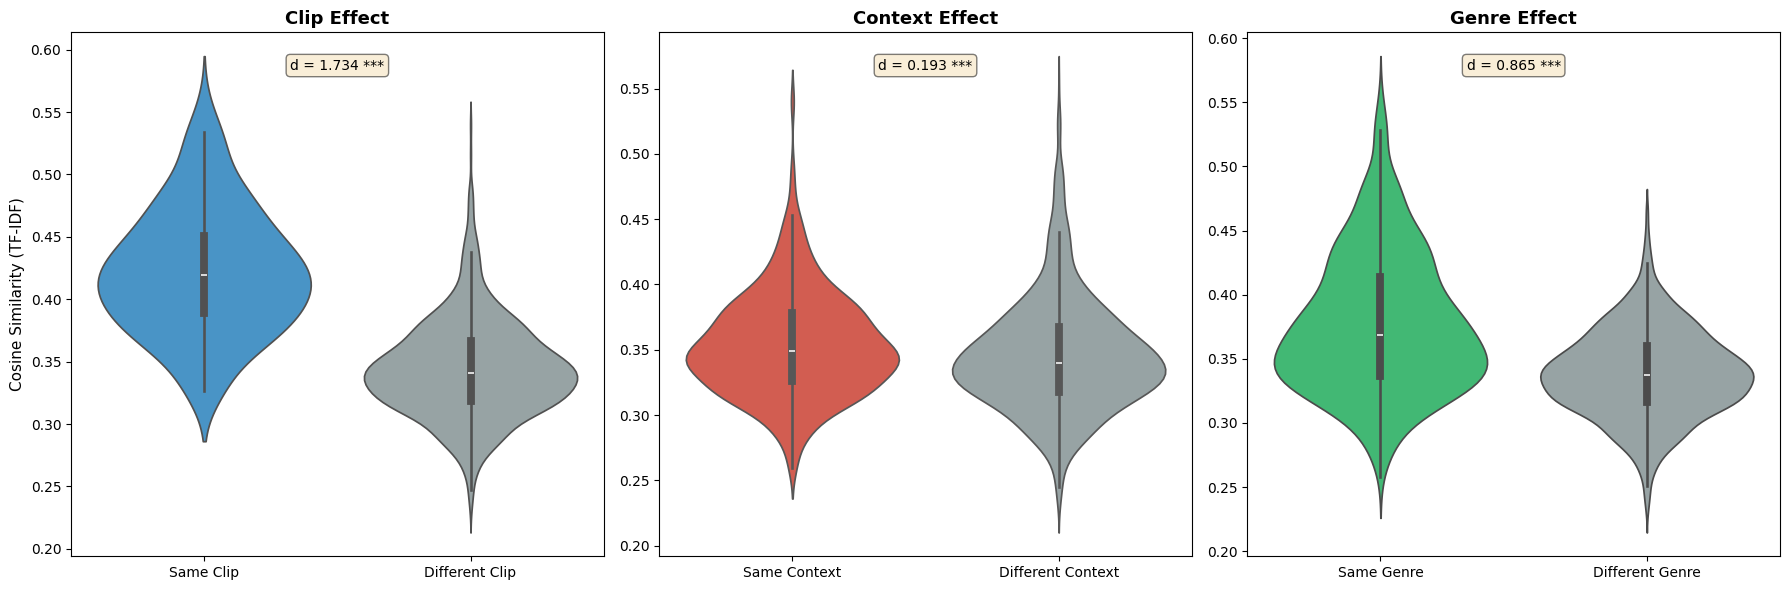

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Clip comparison
clip_data = sim_df_docs.copy()
clip_data['clip_label'] = clip_data['same_clip'].map({True: 'Same Clip', False: 'Different Clip'})
sns.violinplot(data=clip_data, x='clip_label', y='similarity',
               order=['Same Clip', 'Different Clip'], ax=axes[0],
               palette=['#3498db', '#95a5a6'])
axes[0].set_title('Clip Effect', fontsize=13, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('Cosine Similarity (TF-IDF)', fontsize=11)
axes[0].text(0.5, 0.95, f"d = {clip_comp['d']:.3f} {clip_comp['sig']}",
             ha='center', va='top', transform=axes[0].transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Context comparison
context_data = sim_df_docs.copy()
context_data['context_label'] = context_data['same_context'].map({True: 'Same Context', False: 'Different Context'})
sns.violinplot(data=context_data, x='context_label', y='similarity',
               order=['Same Context', 'Different Context'], ax=axes[1],
               palette=['#e74c3c', '#95a5a6'])
axes[1].set_title('Context Effect', fontsize=13, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].text(0.5, 0.95, f"d = {context_comp['d']:.3f} {context_comp['sig']}",
             ha='center', va='top', transform=axes[1].transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Genre comparison
genre_data = sim_df_docs.copy()
genre_data['genre_label'] = genre_data['same_genre'].map({True: 'Same Genre', False: 'Different Genre'})
sns.violinplot(data=genre_data, x='genre_label', y='similarity',
               order=['Same Genre', 'Different Genre'], ax=axes[2],
               palette=['#2ecc71', '#95a5a6'])
axes[2].set_title('Genre Effect', fontsize=13, fontweight='bold')
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].text(0.5, 0.95, f"d = {genre_comp['d']:.3f} {genre_comp['sig']}",
             ha='center', va='top', transform=axes[2].transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_01_binary_comparisons.png',
            dpi=300, bbox_inches='tight')
plt.show()

#### Interaction: Clip x Context

In [10]:
# Calculate marginal effects from binary comparisons
clip_effect = clip_comp['diff']
context_effect = context_comp['diff']

# Get means for each condition
same_clip_diff_context_mean = sim_df_docs[sim_df_docs['condition'] == 'same_clip_diff_context']['similarity'].mean()
diff_clip_same_context_mean = sim_df_docs[sim_df_docs['condition'] == 'diff_clip_same_context']['similarity'].mean()
diff_clip_diff_context_mean = sim_df_docs[
    sim_df_docs['condition'].isin(['diff_clip_diff_context_same_genre', 'diff_clip_diff_context_diff_genre'])
]['similarity'].mean()

# Expected additive effect (if independent)
expected_additive = diff_clip_diff_context_mean + clip_effect + context_effect

print(f"\nBaseline (both different): M={diff_clip_diff_context_mean:.4f}")
print(f"Clip effect: +{clip_effect:.4f}")
print(f"Context effect: +{context_effect:.4f}")
print(f"\nExpected if ADDITIVE (independent): {expected_additive:.4f}")

print("\n" + "-"*70)
print("2x2 Design Mean Similarity:")
print("-"*70)
print(f"                      Same Context         Different Context")
print(f"Same Clip            [same document]      {same_clip_diff_context_mean:.4f}")
print(f"Different Clip       {diff_clip_same_context_mean:.4f}         {diff_clip_diff_context_mean:.4f}")

# Calculate main effects explicitly
same_clip_marginal = same_clip_diff_context_mean  # Only this cell available
diff_clip_marginal = (diff_clip_same_context_mean + diff_clip_diff_context_mean) / 2
same_context_marginal = diff_clip_same_context_mean  # Only this cell available
diff_context_marginal = (same_clip_diff_context_mean + diff_clip_diff_context_mean) / 2

print(f"\nMarginal Means:")
print(f"  Same Clip (from available data): {same_clip_marginal:.4f}")
print(f"  Different Clip (average): {diff_clip_marginal:.4f}")
print(f"  → Estimated clip effect: {same_clip_marginal - diff_clip_marginal:.4f}")

print(f"\n  Same Context (from available data): {same_context_marginal:.4f}")
print(f"  Different Context (average): {diff_context_marginal:.4f}")
print(f"  → Estimated context effect: {same_context_marginal - diff_context_marginal:.4f}")

# Compare main effects
if abs(same_clip_marginal - diff_clip_marginal) > abs(same_context_marginal - diff_context_marginal):
    print(f"\n→ CLIP has larger estimated effect than CONTEXT")
else:
    print(f"\n→ CONTEXT has larger estimated effect than CLIP")


Baseline (both different): M=0.3408
Clip effect: +0.0785
Context effect: +0.0081

Expected if ADDITIVE (independent): 0.4275

----------------------------------------------------------------------
2x2 Design Mean Similarity:
----------------------------------------------------------------------
                      Same Context         Different Context
Same Clip            [same document]      0.4226
Different Clip       0.3540         0.3408

Marginal Means:
  Same Clip (from available data): 0.4226
  Different Clip (average): 0.3474
  → Estimated clip effect: 0.0752

  Same Context (from available data): 0.3540
  Different Context (average): 0.3817
  → Estimated context effect: -0.0277

→ CLIP has larger estimated effect than CONTEXT


#### Individual Context Effects

In [11]:
print("\n" + "="*70)
print("SPECIFIC CONTEXT ANALYSIS")
print("="*70)
print("Testing whether specific contexts (bar, concert, movie, videogame)")
print("produce distinctive thought patterns\n")

# Get context information from METdocs
doc_contexts = METdocs['context_word'].values

# Add context labels to similarity dataframe
sim_df_docs['context_i'] = sim_df_docs['doc_i'].map(lambda x: doc_contexts[x])
sim_df_docs['context_j'] = sim_df_docs['doc_j'].map(lambda x: doc_contexts[x])

# 1. WITHIN-CONTEXT SIMILARITY: How similar are thoughts within each context?
print("\n1. WITHIN-CONTEXT SIMILARITY")
print("-" * 70)
print("When different music is heard with the same context, how similar are thoughts?")

within_context_results = []
contexts = METdocs['context_word'].unique()

for context in contexts:
    # Get similarity for same context, different clip
    context_sims = sim_df_docs[
        (sim_df_docs['condition'] == 'diff_clip_same_context') &
        (sim_df_docs['context_i'] == context) &
        (sim_df_docs['context_j'] == context)
    ]['similarity']

    if len(context_sims) > 0:
        within_context_results.append({
            'context': context,
            'mean': context_sims.mean(),
            'std': context_sims.std(),
            'n': len(context_sims),
            'cv': context_sims.std() / context_sims.mean()
        })

        print(f"\n{context.upper()}:")
        print(f"  Mean similarity: {context_sims.mean():.4f}")
        print(f"  SD: {context_sims.std():.4f}")
        print(f"  CV: {context_sims.std() / context_sims.mean():.4f}")
        print(f"  N pairs: {len(context_sims)}")

within_context_df = pd.DataFrame(within_context_results).sort_values('mean', ascending=False)

print("\n" + "="*70)
print("RANKING: Contexts by Thought Convergence")
print("="*70)
for i, row in within_context_df.iterrows():
    print(f"  {i+1}. {row['context'].upper()}: M={row['mean']:.4f} (CV={row['cv']:.4f})")

print(f"\n→ {within_context_df.iloc[0]['context'].upper()} produces MOST similar thoughts")
print(f"→ {within_context_df.iloc[-1]['context'].upper()} produces MOST DIVERSE thoughts")


# 2. PAIRWISE CONTEXT COMPARISONS
print("\n\n2. PAIRWISE CONTEXT COMPARISONS")
print("-" * 70)

context_pairs = []
contexts_list = list(contexts)

for i, ctx1 in enumerate(contexts_list):
    for ctx2 in contexts_list[i+1:]:
        ctx1_sims = sim_df_docs[
            (sim_df_docs['condition'] == 'diff_clip_same_context') &
            (sim_df_docs['context_i'] == ctx1) &
            (sim_df_docs['context_j'] == ctx1)
        ]['similarity']

        ctx2_sims = sim_df_docs[
            (sim_df_docs['condition'] == 'diff_clip_same_context') &
            (sim_df_docs['context_i'] == ctx2) &
            (sim_df_docs['context_j'] == ctx2)
        ]['similarity']

        if len(ctx1_sims) > 0 and len(ctx2_sims) > 0:
            t_stat, p_val = stats.ttest_ind(ctx1_sims, ctx2_sims)
            pooled_std = np.sqrt((ctx1_sims.std()**2 + ctx2_sims.std()**2) / 2)
            effect_size = (ctx1_sims.mean() - ctx2_sims.mean()) / pooled_std

            if p_val < 0.001:
                sig = "***"
            elif p_val < 0.01:
                sig = "**"
            elif p_val < 0.05:
                sig = "*"
            else:
                sig = "n.s."

            context_pairs.append({
                'context1': ctx1,
                'context2': ctx2,
                'mean1': ctx1_sims.mean(),
                'mean2': ctx2_sims.mean(),
                'difference': ctx1_sims.mean() - ctx2_sims.mean(),
                't': t_stat,
                'p': p_val,
                'd': effect_size,
                'sig': sig
            })

context_pairs_df = pd.DataFrame(context_pairs).sort_values('d', key=abs, ascending=False)

print("\nSignificant differences between contexts:")
for _, row in context_pairs_df.iterrows():
    if row['sig'] != 'n.s.':
        print(f"\n{row['context1'].upper()} vs {row['context2'].upper()}:")
        print(f"  Means: {row['mean1']:.4f} vs {row['mean2']:.4f}")
        print(f"  Difference: {row['difference']:.4f}")
        print(f"  t = {row['t']:.3f}, p = {row['p']:.4f} {row['sig']}, d = {row['d']:.3f}")


# 3. CONTEXT AS MODERATOR OF MUSIC EFFECT
print("\n\n3. CONTEXT AS MODERATOR: Does music effect vary by context?")
print("-" * 70)

context_music_moderator = []

for context in contexts:
    # Music effect within this context
    music_sims = sim_df_docs[
        (sim_df_docs['condition'] == 'same_clip_diff_context') &
        ((sim_df_docs['context_i'] == context) | (sim_df_docs['context_j'] == context))
    ]['similarity']

    # Baseline (different music, different context)
    baseline_sims = sim_df_docs[
        (sim_df_docs['condition'].isin(['diff_clip_diff_context_same_genre',
                                        'diff_clip_diff_context_diff_genre'])) &
        ((sim_df_docs['context_i'] == context) | (sim_df_docs['context_j'] == context))
    ]['similarity']

    if len(music_sims) > 0 and len(baseline_sims) > 0:
        music_effect = music_sims.mean() - baseline_sims.mean()

        context_music_moderator.append({
            'context': context,
            'music_mean': music_sims.mean(),
            'baseline_mean': baseline_sims.mean(),
            'music_effect': music_effect,
            'n_music': len(music_sims),
            'n_baseline': len(baseline_sims)
        })

        print(f"\n{context.upper()}:")
        print(f"  Same music: {music_sims.mean():.4f}")
        print(f"  Different music: {baseline_sims.mean():.4f}")
        print(f"  Music effect: +{music_effect:.4f}")

context_mod_df = pd.DataFrame(context_music_moderator).sort_values('music_effect', ascending=False)

print("\n" + "="*70)
if len(context_mod_df) > 0:
    print(f"→ Music effect is STRONGEST in: {context_mod_df.iloc[0]['context'].upper()}")
    print(f"→ Music effect is WEAKEST in: {context_mod_df.iloc[-1]['context'].upper()}")


# 4. CONTEXT MODERATION EFFECT (Music vs Context Direct Comparison)
print("\n\n4. CONTEXT AS MODERATOR: Does context influence music vs. context effects?")
print("-" * 70)

music_driven_context = sim_df_docs[
    (sim_df_docs['condition'] == 'same_clip_diff_context')
]
context_driven = sim_df_docs[
    (sim_df_docs['condition'] == 'diff_clip_same_context')
]

context_moderator_results = []
for context in contexts:
    # Filter for pairs where both docs are from this context
    music_context_sims = music_driven_context[
        ((music_driven_context['context_i'] == context) |
         (music_driven_context['context_j'] == context))
    ]['similarity']

    context_sims = context_driven[
        (context_driven['context_i'] == context) &
        (context_driven['context_j'] == context)
    ]['similarity']

    if len(music_context_sims) > 0 and len(context_sims) > 0:
        # Compare music vs context within this context
        t_stat, p_val = stats.ttest_ind(music_context_sims, context_sims)
        pooled_std = np.sqrt((music_context_sims.std()**2 + context_sims.std()**2) / 2)
        effect_size = (music_context_sims.mean() - context_sims.mean()) / pooled_std

        context_moderator_results.append({
            'context': context,
            'music_mean': music_context_sims.mean(),
            'context_mean': context_sims.mean(),
            'difference': music_context_sims.mean() - context_sims.mean(),
            'effect_size': effect_size,
            't': t_stat,
            'p': p_val,
            'n_music': len(music_context_sims),
            'n_context': len(context_sims)
        })

        print(f"\n{context.upper()}:")
        print(f"  Music-driven: M={music_context_sims.mean():.4f} (N={len(music_context_sims)})")
        print(f"  Context-driven: M={context_sims.mean():.4f} (N={len(context_sims)})")
        print(f"  Difference: {music_context_sims.mean() - context_sims.mean():.4f}")
        print(f"  t = {t_stat:.3f}, p = {p_val:.4f}, d = {effect_size:.3f}")

        if music_context_sims.mean() > context_sims.mean():
            print(f"  → In {context}, MUSIC drives similarity more than context")
        else:
            print(f"  → In {context}, CONTEXT drives similarity more than music")

# Save all results
within_context_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_within_context_analysis.csv',
                         index=False)
context_pairs_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_context_pairwise_comparisons.csv',
                       index=False)
context_mod_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_context_moderator.csv',
                     index=False)

# Save context moderator results
if len(context_moderator_results) > 0:
    context_moderator_df = pd.DataFrame(context_moderator_results)
    context_moderator_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_context_moderator_music_vs_context.csv',
                                index=False)

    # Test if effect sizes differ significantly between contexts
    print("\n" + "="*70)
    print("INTERACTION TEST: Context × Factor Effect")
    print("="*70)

    if len(context_moderator_results) >= 2:
        effect_diffs = []
        for i in range(len(context_moderator_df) - 1):
            for j in range(i + 1, len(context_moderator_df)):
                diff = abs(context_moderator_df['effect_size'].iloc[i] -
                          context_moderator_df['effect_size'].iloc[j])
                effect_diffs.append(diff)

        max_diff = max(effect_diffs)
        print(f"\nMaximum effect size difference between contexts: {max_diff:.3f}")

        if max_diff > 0.3:  # Medium effect threshold
            print("→ Music vs. context effects DIFFER substantially by context")
        else:
            print("→ Music vs. context effects are CONSISTENT across contexts")



SPECIFIC CONTEXT ANALYSIS
Testing whether specific contexts (bar, concert, movie, videogame)
produce distinctive thought patterns


1. WITHIN-CONTEXT SIMILARITY
----------------------------------------------------------------------
When different music is heard with the same context, how similar are thoughts?

BAR :
  Mean similarity: 0.3686
  SD: 0.0355
  CV: 0.0964
  N pairs: 120

CONCERT :
  Mean similarity: 0.3582
  SD: 0.0451
  CV: 0.1260
  N pairs: 120

MOVIE:
  Mean similarity: 0.3449
  SD: 0.0382
  CV: 0.1108
  N pairs: 120

VIDEO GAME:
  Mean similarity: 0.3445
  SD: 0.0370
  CV: 0.1073
  N pairs: 120

RANKING: Contexts by Thought Convergence
  1. BAR : M=0.3686 (CV=0.0964)
  2. CONCERT : M=0.3582 (CV=0.1260)
  3. MOVIE: M=0.3449 (CV=0.1108)
  4. VIDEO GAME: M=0.3445 (CV=0.1073)

→ BAR  produces MOST similar thoughts
→ VIDEO GAME produces MOST DIVERSE thoughts


2. PAIRWISE CONTEXT COMPARISONS
----------------------------------------------------------------------

Significant

##### Visualisations

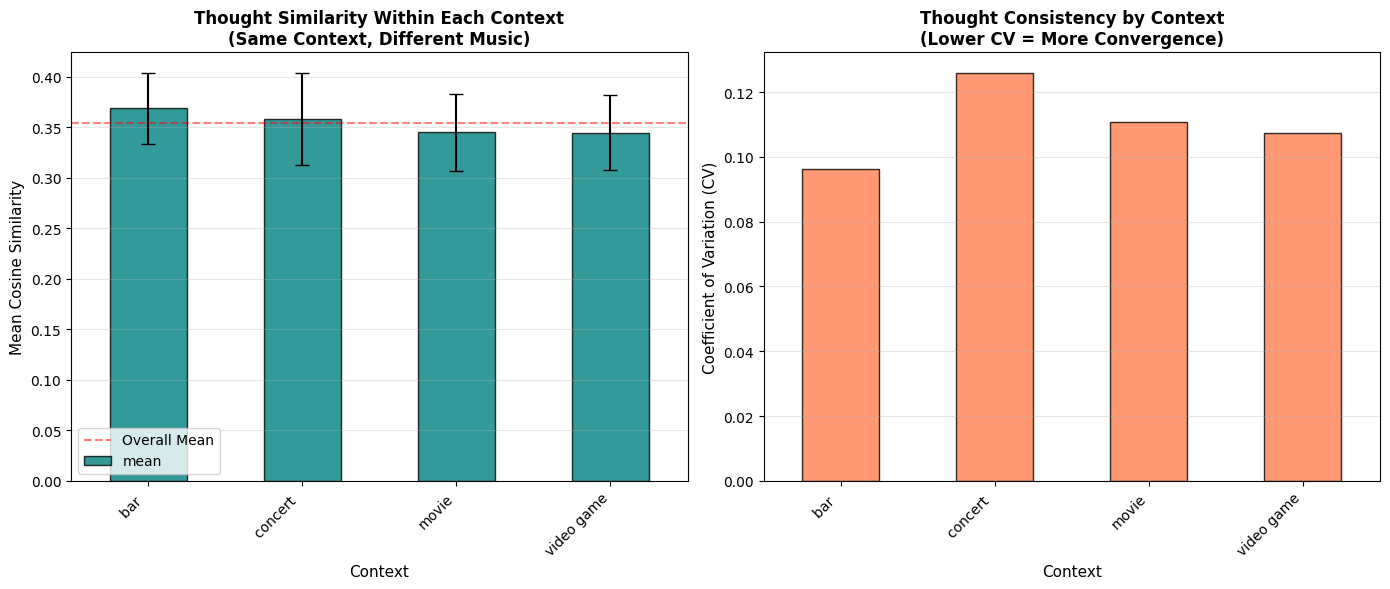

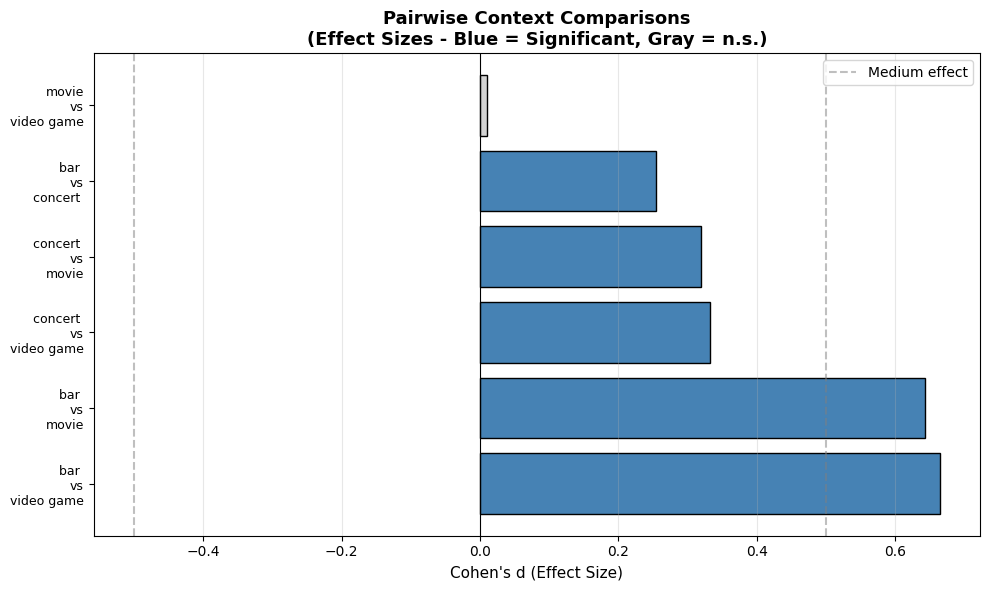

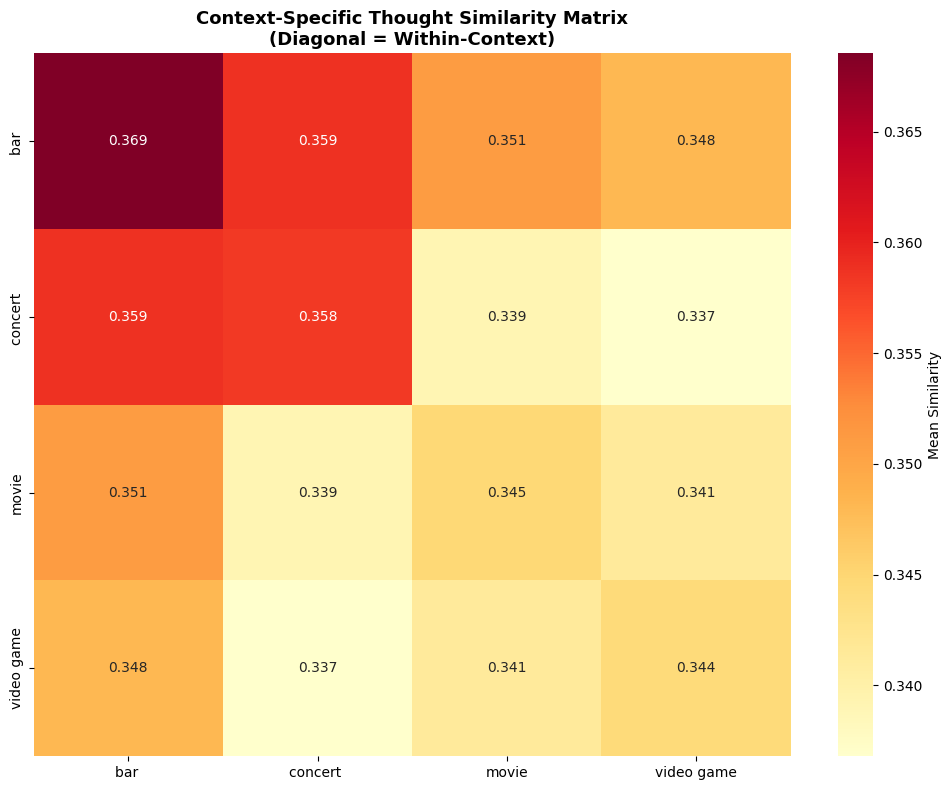

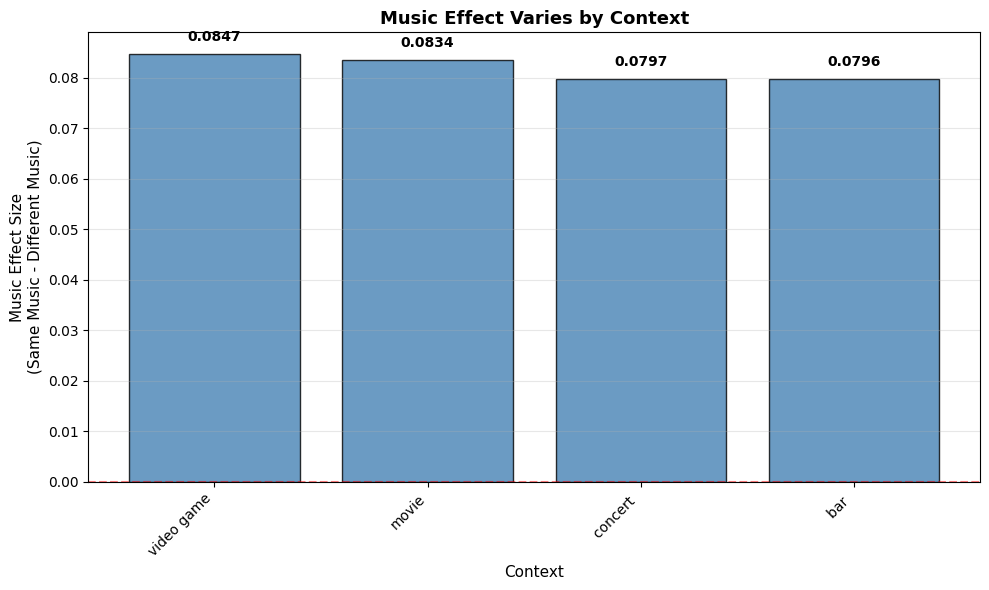

/tmp/ipython-input-652725361.py:164: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


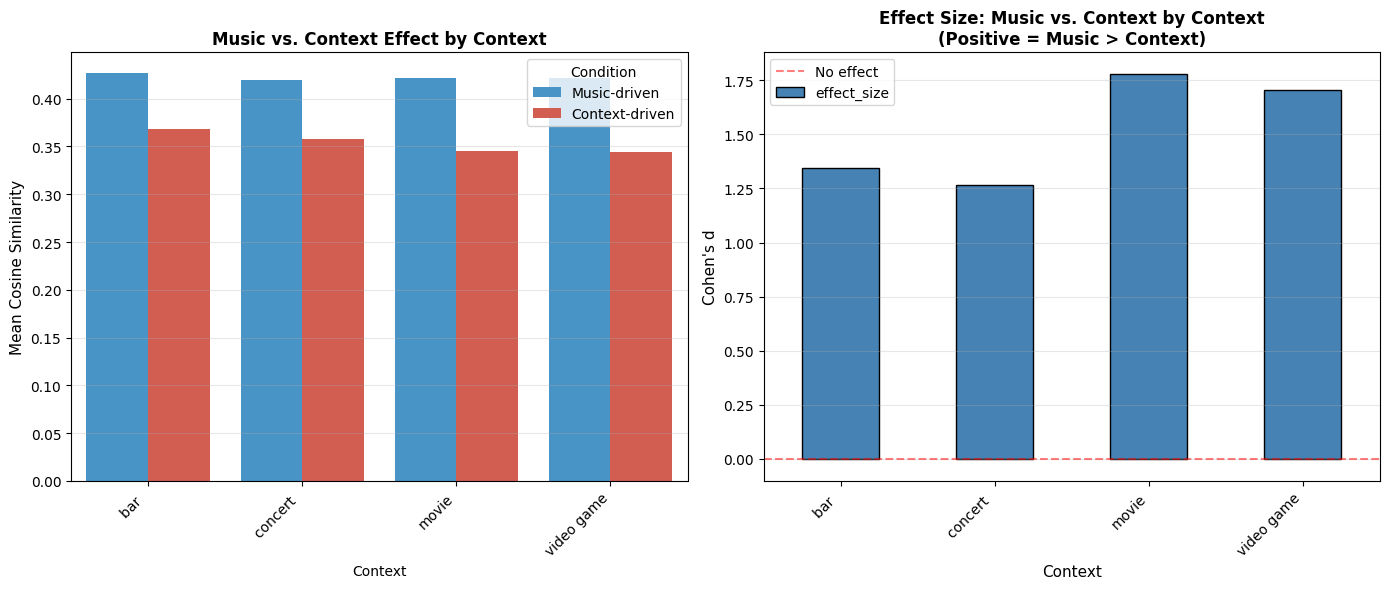

In [12]:
# 1. Within-context similarity comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot with error bars
within_context_df.plot(kind='bar', x='context', y='mean', yerr='std',
                       ax=axes[0], capsize=5, color='teal',
                       edgecolor='black', alpha=0.8, legend=False)
axes[0].set_title('Thought Similarity Within Each Context\n(Same Context, Different Music)',
                 fontsize=12, fontweight='bold')
axes[0].set_xlabel('Context', fontsize=11)
axes[0].set_ylabel('Mean Cosine Similarity', fontsize=11)
axes[0].set_xticklabels(within_context_df['context'], rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=within_context_df['mean'].mean(), color='red',
                linestyle='--', alpha=0.5, label='Overall Mean')
axes[0].legend()


# CV plot - consistency
within_context_df.plot(kind='bar', x='context', y='cv',
                      ax=axes[1], color='coral',
                      edgecolor='black', alpha=0.8, legend=False)
axes[1].set_title('Thought Consistency by Context\n(Lower CV = More Convergence)',
                 fontsize=12, fontweight='bold')
axes[1].set_xlabel('Context', fontsize=11)
axes[1].set_ylabel('Coefficient of Variation (CV)', fontsize=11)
axes[1].set_xticklabels(within_context_df['context'], rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_12_specific_contexts_within.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 2. Pairwise context effect sizes
fig, ax = plt.subplots(figsize=(10, 6))

# Create comparison labels
context_pairs_df['comparison'] = context_pairs_df['context1'] + '\nvs\n' + context_pairs_df['context2']

# Plot effect sizes with significance coloring
colors_sig = ['steelblue' if sig != 'n.s.' else 'lightgray'
              for sig in context_pairs_df['sig']]

ax.barh(range(len(context_pairs_df)), context_pairs_df['d'],
       color=colors_sig, edgecolor='black')
ax.set_yticks(range(len(context_pairs_df)))
ax.set_yticklabels(context_pairs_df['comparison'], fontsize=9)
ax.set_xlabel("Cohen's d (Effect Size)", fontsize=11)
ax.set_title('Pairwise Context Comparisons\n(Effect Sizes - Blue = Significant, Gray = n.s.)',
            fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5, label='Medium effect')
ax.axvline(x=-0.5, color='gray', linestyle='--', alpha=0.5)
ax.grid(axis='x', alpha=0.3)
ax.legend()

plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_16_context_pairwise_effects.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 3. Context pairwise comparison heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Get unique contexts (not the entire array)
unique_contexts = METdocs['context_word'].unique()

# Create matrix for heatmap
context_matrix = np.zeros((len(unique_contexts), len(unique_contexts)))
for i, ctx1 in enumerate(unique_contexts):
    for j, ctx2 in enumerate(unique_contexts):
        if i == j:
            # Diagonal = within-context similarity
            val = within_context_df[within_context_df['context'] == ctx1]['mean'].values
            context_matrix[i, j] = val[0] if len(val) > 0 else 0
        else:
            # Off-diagonal = cross-context similarity
            # Find pairs where context_i matches ctx1 AND context_j matches ctx2
            cross_context_sims = sim_df_docs[
                (sim_df_docs['context_i'] == ctx1) &
                (sim_df_docs['context_j'] == ctx2)
            ]['similarity']

            if len(cross_context_sims) > 0:
                context_matrix[i, j] = cross_context_sims.mean()
            else:
                # Try the reverse
                cross_context_sims = sim_df_docs[
                    (sim_df_docs['context_i'] == ctx2) &
                    (sim_df_docs['context_j'] == ctx1)
                ]['similarity']
                context_matrix[i, j] = cross_context_sims.mean() if len(cross_context_sims) > 0 else 0

sns.heatmap(context_matrix, annot=True, fmt='.3f', cmap='YlOrRd',
            xticklabels=unique_contexts, yticklabels=unique_contexts, ax=ax,
            cbar_kws={'label': 'Mean Similarity'})
ax.set_title('Context-Specific Thought Similarity Matrix\n(Diagonal = Within-Context)',
            fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_13_context_similarity_matrix.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 4. Context as moderator of music effect
fig, ax = plt.subplots(figsize=(10, 6))

if len(context_mod_df) > 0:
    x_pos = np.arange(len(context_mod_df))
    bars = ax.bar(x_pos, context_mod_df['music_effect'], color='steelblue',
          edgecolor='black', alpha=0.8)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(context_mod_df['context'], rotation=45, ha='right')
    ax.set_ylabel('Music Effect Size\n(Same Music - Different Music)', fontsize=11)
    ax.set_xlabel('Context', fontsize=11)
    ax.set_title("Music Effect Varies by Context", fontsize=13, fontweight='bold')
    ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    ax.grid(axis='y', alpha=0.3)

    # Add value labels
    for i, val in enumerate(context_mod_df['music_effect']):
        y_offset = 0.002 if val >= 0 else -0.002
        va = 'bottom' if val >= 0 else 'top'
        ax.text(i, val + y_offset, f'{val:.4f}', ha='center', va=va,
               fontsize=10, fontweight='bold')
else:
    ax.text(0.5, 0.5, 'Insufficient data for music effect analysis',
            ha='center', va='center', fontsize=14, transform=ax.transAxes)

plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_14_context_moderates_music.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 5. Context moderation: Music vs Context comparison (NEW - from genre analysis)
if len(context_moderator_results) > 0:
    context_moderator_df = pd.DataFrame(context_moderator_results)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    ## Context-specific comparisons
    context_comparison_data = []
    for _, row in context_moderator_df.iterrows():
        context_comparison_data.append({
            'Context': row['context'],
            'Condition': 'Music-driven',
            'Similarity': row['music_mean']
        })
        context_comparison_data.append({
            'Context': row['context'],
            'Condition': 'Context-driven',
            'Similarity': row['context_mean']
        })

    context_comp_df = pd.DataFrame(context_comparison_data)
    sns.barplot(data=context_comp_df, x='Context', y='Similarity', hue='Condition',
               ax=axes[0], palette=['#3498db', '#e74c3c'])
    axes[0].set_title('Music vs. Context Effect by Context', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Mean Cosine Similarity', fontsize=11)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
    axes[0].legend(title='Condition')
    axes[0].grid(axis='y', alpha=0.3)

    ## Effect sizes by context
    context_moderator_df.plot(kind='bar', x='context', y='effect_size', ax=axes[1],
                             color='steelblue', edgecolor='black', legend=False)

    # Fixed y-axis for effect size plot
    y_min = context_moderator_df['effect_size'].min()
    y_max = context_moderator_df['effect_size'].max()
    y_range = y_max - y_min
    padding = max(y_range * 0.2, 0.1)  # At least 0.1 padding

    if y_min >= 0:
        axes[1].set_ylim(bottom=-padding, top=y_max + padding)
    elif y_max <= 0:
        axes[1].set_ylim(bottom=y_min - padding, top=padding)
    else:
        axes[1].set_ylim(bottom=y_min - padding, top=y_max + padding)

    axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1.5, label='No effect')
    axes[1].set_title('Effect Size: Music vs. Context by Context\n(Positive = Music > Context)',
                     fontsize=12, fontweight='bold')
    axes[1].set_ylabel("Cohen's d", fontsize=11)
    axes[1].set_xlabel('Context', fontsize=11)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
    axes[1].grid(axis='y', alpha=0.3)
    axes[1].legend()

    plt.tight_layout()
    plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_19_context_music_vs_context_moderator.png',
                dpi=300, bbox_inches='tight')
    plt.show()


#### Individual Genre Effects

In [13]:
print("\n" + "="*70)
print("SPECIFIC GENRE ANALYSIS")
print("="*70)
print("Testing whether specific genres (80s, Electronic, Jazz, Metal)")
print("produce distinctive thought patterns\n")

# Genre information already added earlier, but ensure it's there
if 'genre_i' not in sim_df_docs.columns:
    doc_genres = METdocs['genre_code'].values
    sim_df_docs['genre_i'] = sim_df_docs['doc_i'].map(lambda x: doc_genres[x])
    sim_df_docs['genre_j'] = sim_df_docs['doc_j'].map(lambda x: doc_genres[x])

# 1. WITHIN-GENRE SIMILARITY: How similar are thoughts within each genre?
print("\n1. WITHIN-GENRE SIMILARITY")
print("-" * 70)
print("When different clips from the same genre are heard, how similar are thoughts?")

within_genre_results = []
genres = METdocs['genre_code'].unique()

for genre in genres:
    # Get similarity for same genre, different clip
    genre_sims = sim_df_docs[
        (sim_df_docs['same_genre'] == True) &
        (sim_df_docs['same_clip'] == False) &
        (sim_df_docs['genre_i'] == genre) &
        (sim_df_docs['genre_j'] == genre)
    ]['similarity']

    if len(genre_sims) > 0:
        within_genre_results.append({
            'genre': genre,
            'mean': genre_sims.mean(),
            'std': genre_sims.std(),
            'n': len(genre_sims),
            'cv': genre_sims.std() / genre_sims.mean()
        })

        print(f"\n{genre.upper()}:")
        print(f"  Mean similarity: {genre_sims.mean():.4f}")
        print(f"  SD: {genre_sims.std():.4f}")
        print(f"  CV: {genre_sims.std() / genre_sims.mean():.4f}")
        print(f"  N pairs: {len(genre_sims)}")

within_genre_df = pd.DataFrame(within_genre_results).sort_values('mean', ascending=False)

print("\n" + "="*70)
print("RANKING: Genres by Thought Convergence")
print("="*70)
for i, row in within_genre_df.iterrows():
    print(f"  {i+1}. {row['genre'].upper()}: M={row['mean']:.4f} (CV={row['cv']:.4f})")

print(f"\n→ {within_genre_df.iloc[0]['genre'].upper()} produces MOST similar thoughts")
print(f"→ {within_genre_df.iloc[-1]['genre'].upper()} produces MOST DIVERSE thoughts")


# 2. PAIRWISE GENRE COMPARISONS
print("\n\n2. PAIRWISE GENRE COMPARISONS")
print("-" * 70)

genre_pairs = []
genres_list = list(genres)

for i, genre1 in enumerate(genres_list):
    for genre2 in genres_list[i+1:]:
        genre1_sims = sim_df_docs[
            (sim_df_docs['same_genre'] == True) &
            (sim_df_docs['same_clip'] == False) &
            (sim_df_docs['genre_i'] == genre1) &
            (sim_df_docs['genre_j'] == genre1)
        ]['similarity']

        genre2_sims = sim_df_docs[
            (sim_df_docs['same_genre'] == True) &
            (sim_df_docs['same_clip'] == False) &
            (sim_df_docs['genre_i'] == genre2) &
            (sim_df_docs['genre_j'] == genre2)
        ]['similarity']

        if len(genre1_sims) > 0 and len(genre2_sims) > 0:
            t_stat, p_val = stats.ttest_ind(genre1_sims, genre2_sims)
            pooled_std = np.sqrt((genre1_sims.std()**2 + genre2_sims.std()**2) / 2)
            effect_size = (genre1_sims.mean() - genre2_sims.mean()) / pooled_std

            if p_val < 0.001:
                sig = "***"
            elif p_val < 0.01:
                sig = "**"
            elif p_val < 0.05:
                sig = "*"
            else:
                sig = "n.s."

            genre_pairs.append({
                'genre1': genre1,
                'genre2': genre2,
                'mean1': genre1_sims.mean(),
                'mean2': genre2_sims.mean(),
                'difference': genre1_sims.mean() - genre2_sims.mean(),
                't': t_stat,
                'p': p_val,
                'd': effect_size,
                'sig': sig
            })

genre_pairs_df = pd.DataFrame(genre_pairs).sort_values('d', key=abs, ascending=False)

print("\nSignificant differences between genres:")
for _, row in genre_pairs_df.iterrows():
    if row['sig'] != 'n.s.':
        print(f"\n{row['genre1'].upper()} vs {row['genre2'].upper()}:")
        print(f"  Means: {row['mean1']:.4f} vs {row['mean2']:.4f}")
        print(f"  Difference: {row['difference']:.4f}")
        print(f"  t = {row['t']:.3f}, p = {row['p']:.4f} {row['sig']}, d = {row['d']:.3f}")


# 3. GENRE AS MODERATOR OF MUSIC EFFECT
print("\n\n3. GENRE AS MODERATOR: Does music effect vary by genre?")
print("-" * 70)

genre_music_moderator = []

for genre in genres:
    # Music effect within this genre (same music, different context)
    music_sims = sim_df_docs[
        (sim_df_docs['condition'] == 'same_clip_diff_context') &
        ((sim_df_docs['genre_i'] == genre) | (sim_df_docs['genre_j'] == genre))
    ]['similarity']

    # Baseline (different music, different context)
    baseline_sims = sim_df_docs[
        (sim_df_docs['condition'].isin(['diff_clip_diff_context_same_genre',
                                        'diff_clip_diff_context_diff_genre'])) &
        ((sim_df_docs['genre_i'] == genre) | (sim_df_docs['genre_j'] == genre))
    ]['similarity']

    if len(music_sims) > 0 and len(baseline_sims) > 0:
        music_effect = music_sims.mean() - baseline_sims.mean()

        genre_music_moderator.append({
            'genre': genre,
            'music_mean': music_sims.mean(),
            'baseline_mean': baseline_sims.mean(),
            'music_effect': music_effect,
            'n_music': len(music_sims),
            'n_baseline': len(baseline_sims)
        })

        print(f"\n{genre.upper()}:")
        print(f"  Same music: {music_sims.mean():.4f} (n={len(music_sims)})")
        print(f"  Different music: {baseline_sims.mean():.4f} (n={len(baseline_sims)})")
        print(f"  Music effect: {music_effect:+.4f}")

genre_music_mod_df = pd.DataFrame(genre_music_moderator).sort_values('music_effect', ascending=False)

print("\n" + "="*70)
if len(genre_music_mod_df) > 0:
    print(f"→ Music effect is STRONGEST in: {genre_music_mod_df.iloc[0]['genre'].upper()}")
    print(f"→ Music effect is WEAKEST in: {genre_music_mod_df.iloc[-1]['genre'].upper()}")


# 4. GENRE MODERATION EFFECT (Music vs Context Direct Comparison)
print("\n\n4. GENRE AS MODERATOR: Does genre influence music vs. context effects?")
print("-" * 70)

music_driven_genre = sim_df_docs[
    (sim_df_docs['condition'] == 'same_clip_diff_context') &
    (sim_df_docs['same_genre'] == True)
]
context_driven_genre = sim_df_docs[
    (sim_df_docs['condition'] == 'diff_clip_same_context') &
    (sim_df_docs['same_genre'] == True)
]

genre_moderator_results = []
for genre in genres:
    # Filter for pairs where both docs are from this genre
    music_genre_sims = music_driven_genre[
        (music_driven_genre['genre_i'] == genre) &
        (music_driven_genre['genre_j'] == genre)
    ]['similarity']

    context_genre_sims = context_driven_genre[
        (context_driven_genre['genre_i'] == genre) &
        (context_driven_genre['genre_j'] == genre)
    ]['similarity']

    if len(music_genre_sims) > 0 and len(context_genre_sims) > 0:
        # Compare music vs context within this genre
        t_stat, p_val = stats.ttest_ind(music_genre_sims, context_genre_sims)
        pooled_std = np.sqrt((music_genre_sims.std()**2 + context_genre_sims.std()**2) / 2)
        effect_size = (music_genre_sims.mean() - context_genre_sims.mean()) / pooled_std

        genre_moderator_results.append({
            'genre': genre,
            'music_mean': music_genre_sims.mean(),
            'context_mean': context_genre_sims.mean(),
            'difference': music_genre_sims.mean() - context_genre_sims.mean(),
            'effect_size': effect_size,
            't': t_stat,
            'p': p_val,
            'n_music': len(music_genre_sims),
            'n_context': len(context_genre_sims)
        })

        print(f"\n{genre.upper()}:")
        print(f"  Music-driven: M={music_genre_sims.mean():.4f} (N={len(music_genre_sims)})")
        print(f"  Context-driven: M={context_genre_sims.mean():.4f} (N={len(context_genre_sims)})")
        print(f"  Difference: {music_genre_sims.mean() - context_genre_sims.mean():.4f}")
        print(f"  t = {t_stat:.3f}, p = {p_val:.4f}, d = {effect_size:.3f}")

        if music_genre_sims.mean() > context_genre_sims.mean():
            print(f"  → In {genre}, MUSIC drives similarity more than context")
        else:
            print(f"  → In {genre}, CONTEXT drives similarity more than music")

# Save all results
within_genre_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_within_genre_analysis.csv',
                       index=False)
genre_pairs_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_genre_pairwise_comparisons.csv',
                     index=False)

# Save genre music moderator results
if len(genre_music_mod_df) > 0:
    genre_music_mod_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_genre_music_moderator.csv',
                              index=False)

# Save genre moderator results
if len(genre_moderator_results) > 0:
    genre_moderator_df = pd.DataFrame(genre_moderator_results)
    genre_moderator_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_genre_moderator_music_vs_context.csv',
                              index=False)

    # Test if effect sizes differ significantly between genres
    print("\n" + "="*70)
    print("INTERACTION TEST: Genre × Factor Effect")
    print("="*70)

    if len(genre_moderator_results) >= 2:
        effect_diffs = []
        for i in range(len(genre_moderator_df) - 1):
            for j in range(i + 1, len(genre_moderator_df)):
                diff = abs(genre_moderator_df['effect_size'].iloc[i] -
                          genre_moderator_df['effect_size'].iloc[j])
                effect_diffs.append(diff)

        max_diff = max(effect_diffs)
        print(f"\nMaximum effect size difference between genres: {max_diff:.3f}")

        if max_diff > 0.3:  # Medium effect threshold
            print("→ Music vs. context effects DIFFER substantially by genre")
        else:
            print("→ Music vs. context effects are CONSISTENT across genres")



SPECIFIC GENRE ANALYSIS
Testing whether specific genres (80s, Electronic, Jazz, Metal)
produce distinctive thought patterns


1. WITHIN-GENRE SIMILARITY
----------------------------------------------------------------------
When different clips from the same genre are heard, how similar are thoughts?

80S:
  Mean similarity: 0.3577
  SD: 0.0315
  CV: 0.0880
  N pairs: 96

ELE:
  Mean similarity: 0.3406
  SD: 0.0379
  CV: 0.1112
  N pairs: 96

JAZ:
  Mean similarity: 0.3670
  SD: 0.0495
  CV: 0.1349
  N pairs: 96

MET:
  Mean similarity: 0.4011
  SD: 0.0548
  CV: 0.1367
  N pairs: 96

RANKING: Genres by Thought Convergence
  4. MET: M=0.4011 (CV=0.1367)
  3. JAZ: M=0.3670 (CV=0.1349)
  1. 80S: M=0.3577 (CV=0.0880)
  2. ELE: M=0.3406 (CV=0.1112)

→ MET produces MOST similar thoughts
→ ELE produces MOST DIVERSE thoughts


2. PAIRWISE GENRE COMPARISONS
----------------------------------------------------------------------

Significant differences between genres:

ELE vs MET:
  Means: 0.34

###### Visualisations

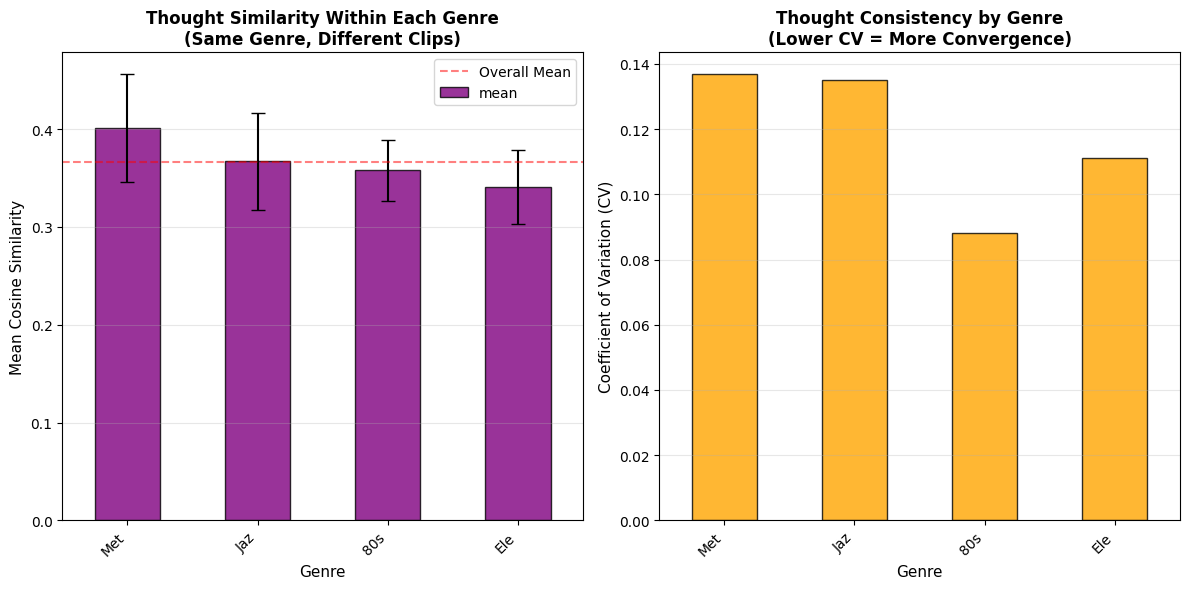

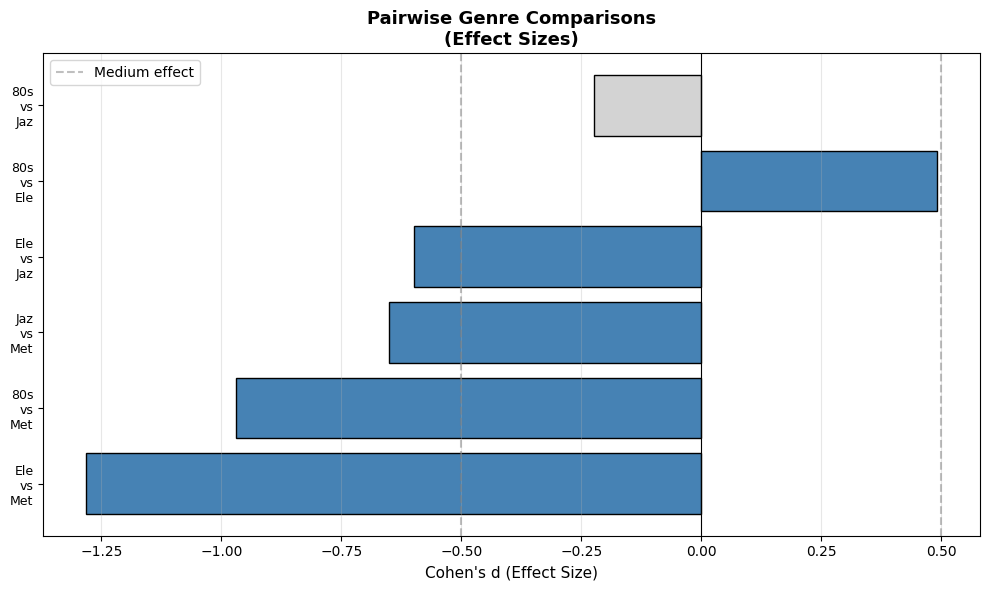

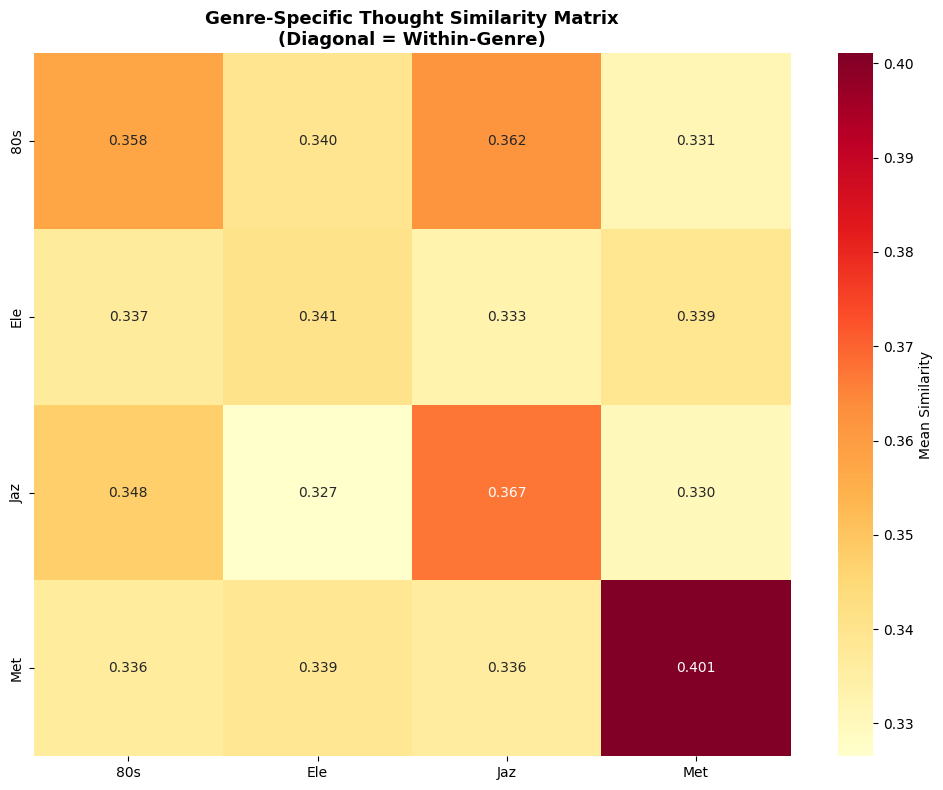

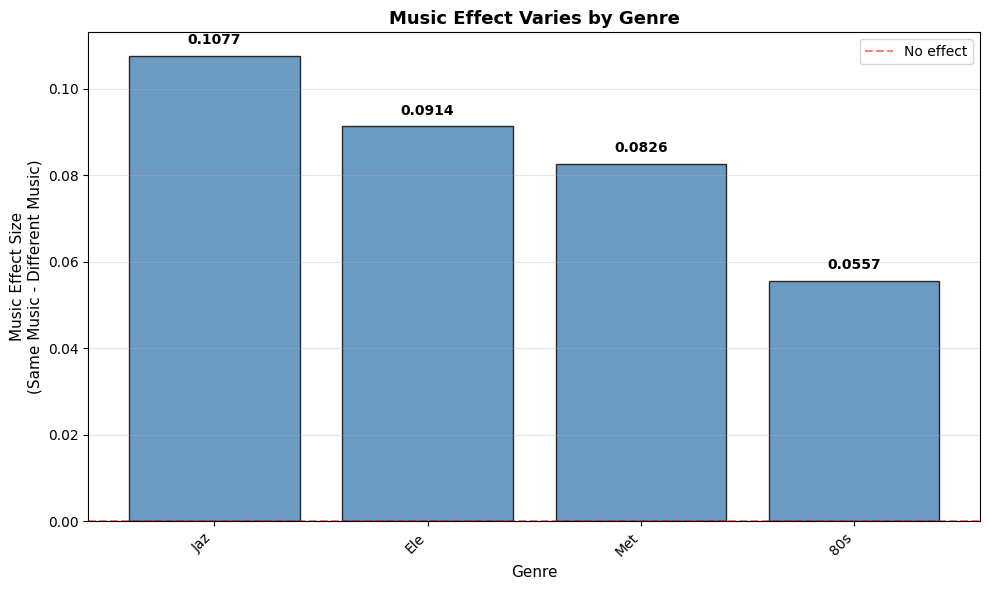

/tmp/ipython-input-1498896284.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


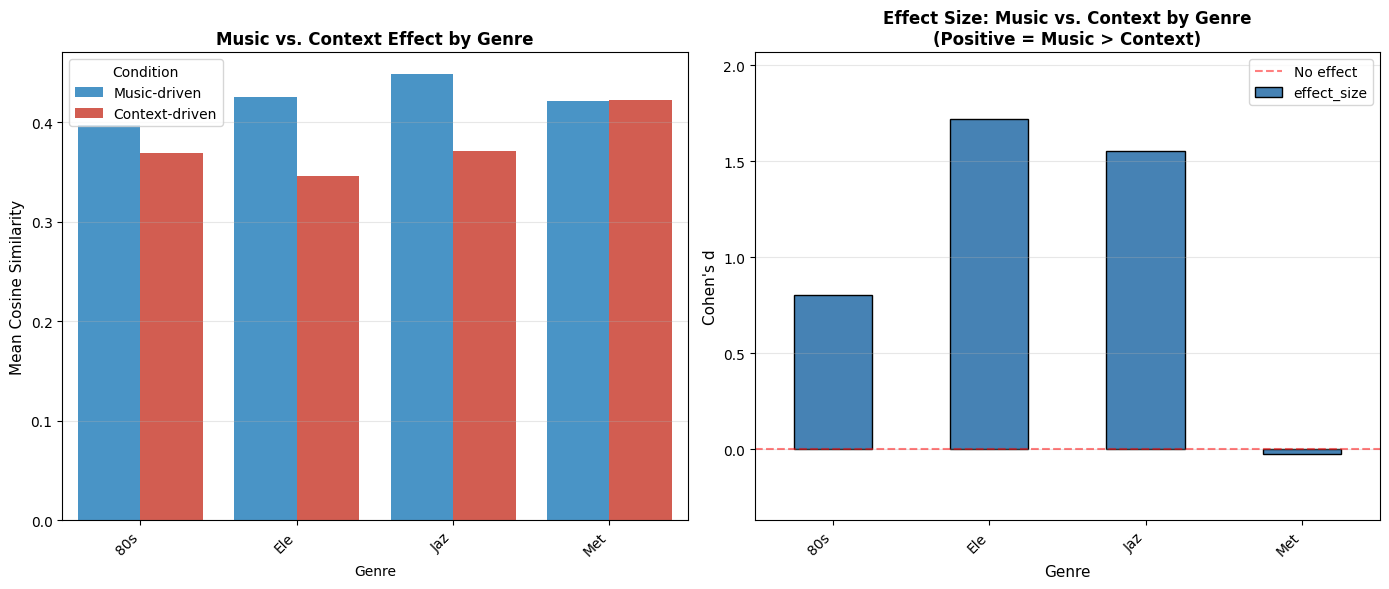

In [14]:
# 1. Within-genre similarity comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot
within_genre_df.plot(kind='bar', x='genre', y='mean', yerr='std',
                    ax=axes[0], capsize=5, color='purple',
                    edgecolor='black', alpha=0.8, legend=False)
axes[0].set_title('Thought Similarity Within Each Genre\n(Same Genre, Different Clips)',
                 fontsize=12, fontweight='bold')
axes[0].set_xlabel('Genre', fontsize=11)
axes[0].set_ylabel('Mean Cosine Similarity', fontsize=11)
axes[0].set_xticklabels(within_genre_df['genre'], rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)
axes[0].axhline(y=within_genre_df['mean'].mean(), color='red',
                linestyle='--', alpha=0.5, label='Overall Mean')
axes[0].legend()

# CV plot
within_genre_df.plot(kind='bar', x='genre', y='cv',
                    ax=axes[1], color='orange',
                    edgecolor='black', alpha=0.8, legend=False)
axes[1].set_title('Thought Consistency by Genre\n(Lower CV = More Convergence)',
                 fontsize=12, fontweight='bold')
axes[1].set_xlabel('Genre', fontsize=11)
axes[1].set_ylabel('Coefficient of Variation (CV)', fontsize=11)
axes[1].set_xticklabels(within_genre_df['genre'], rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_15_specific_genres_within.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 2. Pairwise genre effect sizes
fig, ax = plt.subplots(figsize=(10, 6))

# Create comparison labels
genre_pairs_df['comparison'] = genre_pairs_df['genre1'] + '\nvs\n' + genre_pairs_df['genre2']

# Plot effect sizes
colors_sig = ['steelblue' if sig != 'n.s.' else 'lightgray'
              for sig in genre_pairs_df['sig']]

ax.barh(range(len(genre_pairs_df)), genre_pairs_df['d'],
       color=colors_sig, edgecolor='black')
ax.set_yticks(range(len(genre_pairs_df)))
ax.set_yticklabels(genre_pairs_df['comparison'], fontsize=9)
ax.set_xlabel("Cohen's d (Effect Size)", fontsize=11)
ax.set_title('Pairwise Genre Comparisons\n(Effect Sizes)',
            fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5, label='Medium effect')
ax.axvline(x=-0.5, color='gray', linestyle='--', alpha=0.5)
ax.grid(axis='x', alpha=0.3)
ax.legend()

plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_17_genre_pairwise_effects.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 3. Genre similarity matrix
fig, ax = plt.subplots(figsize=(10, 8))

# Get unique genres
unique_genres = METdocs['genre_code'].unique()

# Create matrix for heatmap
genre_matrix = np.zeros((len(unique_genres), len(unique_genres)))
for i, genre1 in enumerate(unique_genres):
    for j, genre2 in enumerate(unique_genres):
        if i == j:
            # Diagonal = within-genre similarity
            val = within_genre_df[within_genre_df['genre'] == genre1]['mean'].values
            genre_matrix[i, j] = val[0] if len(val) > 0 else np.nan
        else:
            # Off-diagonal = cross-genre similarity
            cross_genre_sims = sim_df_docs[
                (sim_df_docs['genre_i'] == genre1) &
                (sim_df_docs['genre_j'] == genre2)
            ]['similarity']

            if len(cross_genre_sims) > 0:
                genre_matrix[i, j] = cross_genre_sims.mean()
            else:
                # Try the reverse
                cross_genre_sims = sim_df_docs[
                    (sim_df_docs['genre_i'] == genre2) &
                    (sim_df_docs['genre_j'] == genre1)
                ]['similarity']
                genre_matrix[i, j] = cross_genre_sims.mean() if len(cross_genre_sims) > 0 else np.nan

sns.heatmap(genre_matrix, annot=True, fmt='.3f', cmap='YlOrRd',
            xticklabels=unique_genres, yticklabels=unique_genres, ax=ax,
            cbar_kws={'label': 'Mean Similarity'}, mask=np.isnan(genre_matrix))
ax.set_title('Genre-Specific Thought Similarity Matrix\n(Diagonal = Within-Genre)',
            fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_18_genre_similarity_matrix.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 4. Genre as moderator of music effect (NEW - from context analysis)
if len(genre_music_mod_df) > 0:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_pos = np.arange(len(genre_music_mod_df))
    bars = ax.bar(x_pos, genre_music_mod_df['music_effect'], color='steelblue',
          edgecolor='black', alpha=0.8)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(genre_music_mod_df['genre'], rotation=45, ha='right')
    ax.set_ylabel('Music Effect Size\n(Same Music - Different Music)', fontsize=11)
    ax.set_xlabel('Genre', fontsize=11)
    ax.set_title("Music Effect Varies by Genre", fontsize=13, fontweight='bold')
    ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1.5, label='No effect')
    ax.grid(axis='y', alpha=0.3)
    ax.legend()

    # Add value labels
    for i, val in enumerate(genre_music_mod_df['music_effect']):
        y_offset = 0.002 if val >= 0 else -0.002
        va = 'bottom' if val >= 0 else 'top'
        ax.text(i, val + y_offset, f'{val:.4f}', ha='center', va=va,
               fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_20_genre_moderates_music.png',
                dpi=300, bbox_inches='tight')
    plt.show()


# 5. Genre moderation: Music vs Context comparison
if len(genre_moderator_results) > 0:
    genre_moderator_df = pd.DataFrame(genre_moderator_results)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    ## Genre-specific comparisons
    genre_comparison_data = []
    for _, row in genre_moderator_df.iterrows():
        genre_comparison_data.append({
            'Genre': row['genre'],
            'Condition': 'Music-driven',
            'Similarity': row['music_mean']
        })
        genre_comparison_data.append({
            'Genre': row['genre'],
            'Condition': 'Context-driven',
            'Similarity': row['context_mean']
        })

    genre_comp_df = pd.DataFrame(genre_comparison_data)
    sns.barplot(data=genre_comp_df, x='Genre', y='Similarity', hue='Condition',
               ax=axes[0], palette=['#3498db', '#e74c3c'])
    axes[0].set_title('Music vs. Context Effect by Genre', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Mean Cosine Similarity', fontsize=11)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
    axes[0].legend(title='Condition')
    axes[0].grid(axis='y', alpha=0.3)

    ## Effect sizes by genre
    genre_moderator_df.plot(kind='bar', x='genre', y='effect_size', ax=axes[1],
                           color='steelblue', edgecolor='black', legend=False)

    # Fixed y-axis for effect size plot
    y_min = genre_moderator_df['effect_size'].min()
    y_max = genre_moderator_df['effect_size'].max()
    y_range = y_max - y_min
    padding = max(y_range * 0.2, 0.1)  # At least 0.1 padding

    if y_min >= 0:
        axes[1].set_ylim(bottom=-padding, top=y_max + padding)
    elif y_max <= 0:
        axes[1].set_ylim(bottom=y_min - padding, top=padding)
    else:
        axes[1].set_ylim(bottom=y_min - padding, top=y_max + padding)

    axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1.5, label='No effect')
    axes[1].set_title('Effect Size: Music vs. Context by Genre\n(Positive = Music > Context)',
                     fontsize=12, fontweight='bold')
    axes[1].set_ylabel("Cohen's d", fontsize=11)
    axes[1].set_xlabel('Genre', fontsize=11)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
    axes[1].grid(axis='y', alpha=0.3)
    axes[1].legend()

    plt.tight_layout()
    plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_09_genre_moderator.png',
                dpi=300, bbox_inches='tight')
    plt.show()

#### Interaction: Genre x Context

In [15]:
# GENRE-CONTEXT INTERACTION: Do certain genres work better with certain contexts?
print("\nGENRE × CONTEXT INTERACTION")
print("-" * 70)

genre_context_interaction = []

for genre in genres:
    for context in contexts:
        # Get similarity when this specific genre-context pair matches
        specific_sims = sim_df_docs[
            (sim_df_docs['condition'] == 'diff_clip_same_context') &
            (sim_df_docs['genre_i'] == genre) &
            (sim_df_docs['context_i'] == context)
        ]['similarity']

        if len(specific_sims) > 0:
            genre_context_interaction.append({
                'genre': genre,
                'context': context,
                'mean': specific_sims.mean(),
                'std': specific_sims.std(),
                'n': len(specific_sims)
            })

genre_context_df = pd.DataFrame(genre_context_interaction)

# Find best and worst combinations
print("\nTop 5 Genre-Context combinations (highest similarity):")
top_combos = genre_context_df.nlargest(5, 'mean')
for idx, row in top_combos.iterrows():
    print(f"  {row['genre'].upper()} + {row['context'].upper()}: M={row['mean']:.4f}")

print("\nBottom 5 Genre-Context combinations (lowest similarity):")
bottom_combos = genre_context_df.nsmallest(5, 'mean')
for idx, row in bottom_combos.iterrows():
    print(f"  {row['genre'].upper()} + {row['context'].upper()}: M={row['mean']:.4f}")


genre_context_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_genre_context_interaction.csv',
                       index=False)


GENRE × CONTEXT INTERACTION
----------------------------------------------------------------------

Top 5 Genre-Context combinations (highest similarity):
  MET + CONCERT : M=0.4632
  MET + BAR : M=0.4137
  MET + MOVIE: M=0.4095
  MET + VIDEO GAME: M=0.4012
  80S + BAR : M=0.3732

Bottom 5 Genre-Context combinations (lowest similarity):
  JAZ + VIDEO GAME: M=0.3277
  ELE + VIDEO GAME: M=0.3382
  ELE + CONCERT : M=0.3384
  80S + MOVIE: M=0.3396
  JAZ + MOVIE: M=0.3417


###### Visualisation

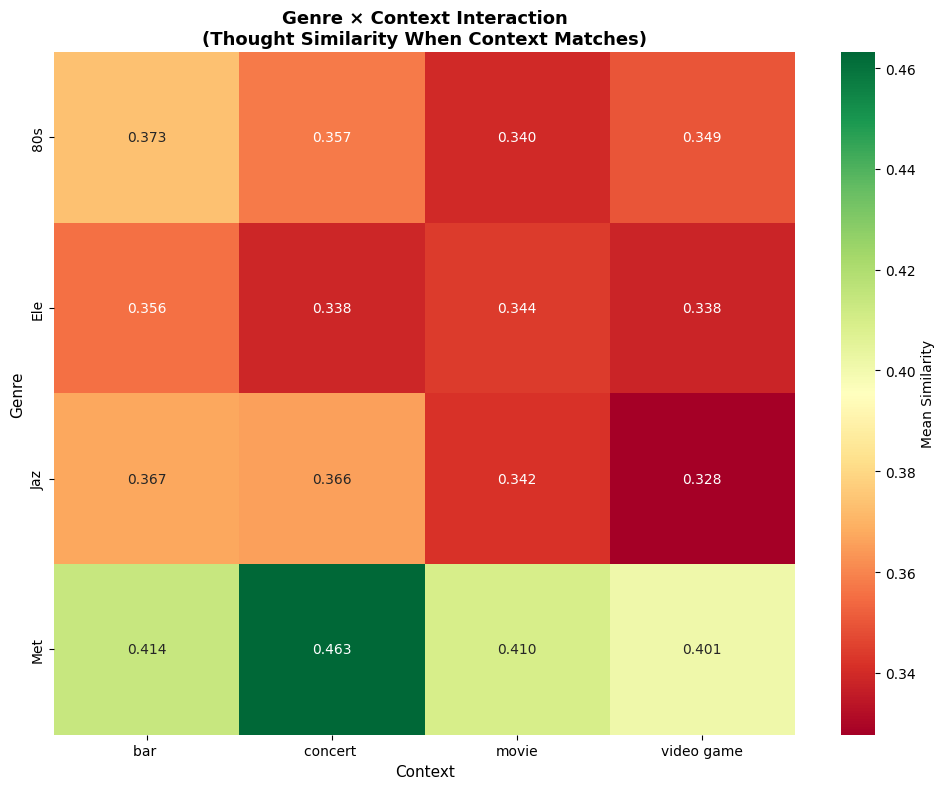

In [16]:
# Genre-Context interaction heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Pivot for heatmap
genre_context_pivot = genre_context_df.pivot(index='genre', columns='context', values='mean')

sns.heatmap(genre_context_pivot, annot=True, fmt='.3f', cmap='RdYlGn',
            ax=ax, cbar_kws={'label': 'Mean Similarity'})
ax.set_title('Genre × Context Interaction\n(Thought Similarity When Context Matches)',
            fontsize=13, fontweight='bold')
ax.set_xlabel('Context', fontsize=11)
ax.set_ylabel('Genre', fontsize=11)
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_16_genre_context_interaction.png',
            dpi=300, bbox_inches='tight')
plt.show()

#### Combined Condition Comparisons (Isolating specific effects)
Testing specific scenarios while controlling for other factors
1. Music vs Context (isolated effects when everything else differs)
2. GENRE EFFECTS (when clip and context both differ)

In [17]:
print("\n\n" + "-"*70)
print("COMBINED CONDITION COMPARISONS")
print("-"*70)
print("Testing specific scenarios while controlling for other factors")

# 1. Music vs Context Influence (when everything else differs)
print("\n1. Music vs Context Influence (isolated effects)")
print("-" * 70)

comp = compare_conditions(
    sim_df_docs,
    'same_clip_diff_context',
    'diff_clip_same_context',
    'Same Clip, Different Context',
    'Different Clip, Same Context'
)
combined_comparisons.append(comp)

print(f"\nSame clip, different context: M={comp['mean1']:.4f} (N={comp['n1']})")
print(f"Different clip, same context: M={comp['mean2']:.4f} (N={comp['n2']})")
print(f"Difference: {comp['diff']:.4f}")
print(f"t({comp['n1'] + comp['n2'] - 2}) = {comp['t']:.3f}, p = {comp['p']:.4f} {comp['sig']}")
print(f"Cohen's d = {comp['d']:.3f}")

if comp['mean1'] > comp['mean2']:
    print("\n→ When isolated: MUSIC (clip) drives similarity MORE than CONTEXT")
else:
    print("\n→ When isolated: CONTEXT drives similarity MORE than MUSIC (clip)")


# 2. GENRE EFFECTS (when clip and context both differ)
print("\n\n2. GENRE EFFECTS: When both clip and context differ")
print("-" * 70)

comp = compare_conditions(
    sim_df_docs,
    'diff_clip_diff_context_same_genre',
    'diff_clip_diff_context_diff_genre',
    'Both Different, Same Genre',
    'Both Different, Different Genre'
)
combined_comparisons.append(comp)

print(f"\nSame genre (different clip & context): M={comp['mean1']:.4f} (N={comp['n1']})")
print(f"Different genre (different clip & context): M={comp['mean2']:.4f} (N={comp['n2']})")
print(f"Difference: {comp['diff']:.4f}")
print(f"t = {comp['t']:.3f}, p = {comp['p']:.4f} {comp['sig']}, d = {comp['d']:.3f}")

if comp['sig'] != 'n.s.':
    print("\n→ Genre creates semantic coherence even when clip and context differ")
else:
    print("\n→ Genre does NOT significantly affect similarity when other factors differ")




----------------------------------------------------------------------
COMBINED CONDITION COMPARISONS
----------------------------------------------------------------------
Testing specific scenarios while controlling for other factors

1. Music vs Context Influence (isolated effects)
----------------------------------------------------------------------

Same clip, different context: M=0.4226 (N=96)
Different clip, same context: M=0.3540 (N=480)
Difference: 0.0686
t(574) = 14.567, p = 0.0000 ***
Cohen's d = 1.504

→ When isolated: MUSIC (clip) drives similarity MORE than CONTEXT


2. GENRE EFFECTS: When both clip and context differ
----------------------------------------------------------------------

Same genre (different clip & context): M=0.3632 (N=288)
Different genre (different clip & context): M=0.3352 (N=1152)
Difference: 0.0280
t = 11.464, p = 0.0000 ***, d = 0.671

→ Genre creates semantic coherence even when clip and context differ


##### Visualisations

/tmp/ipython-input-3119715261.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=comparison_data, x='condition_label', y='similarity', ax=ax,


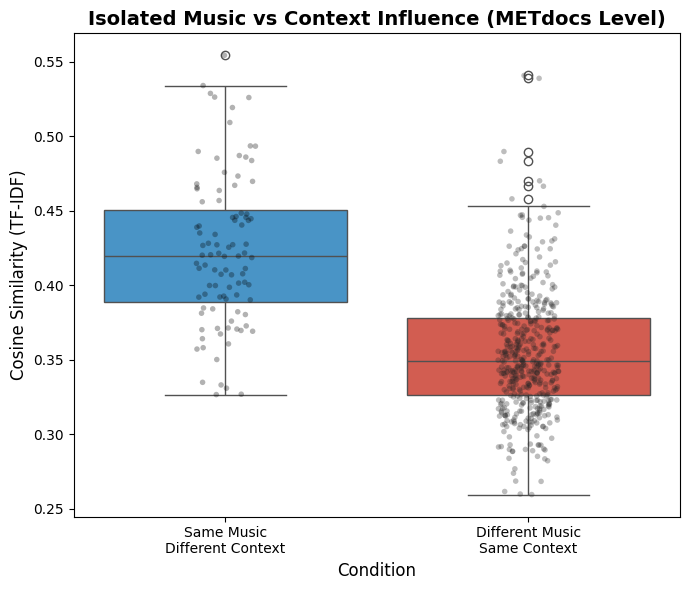

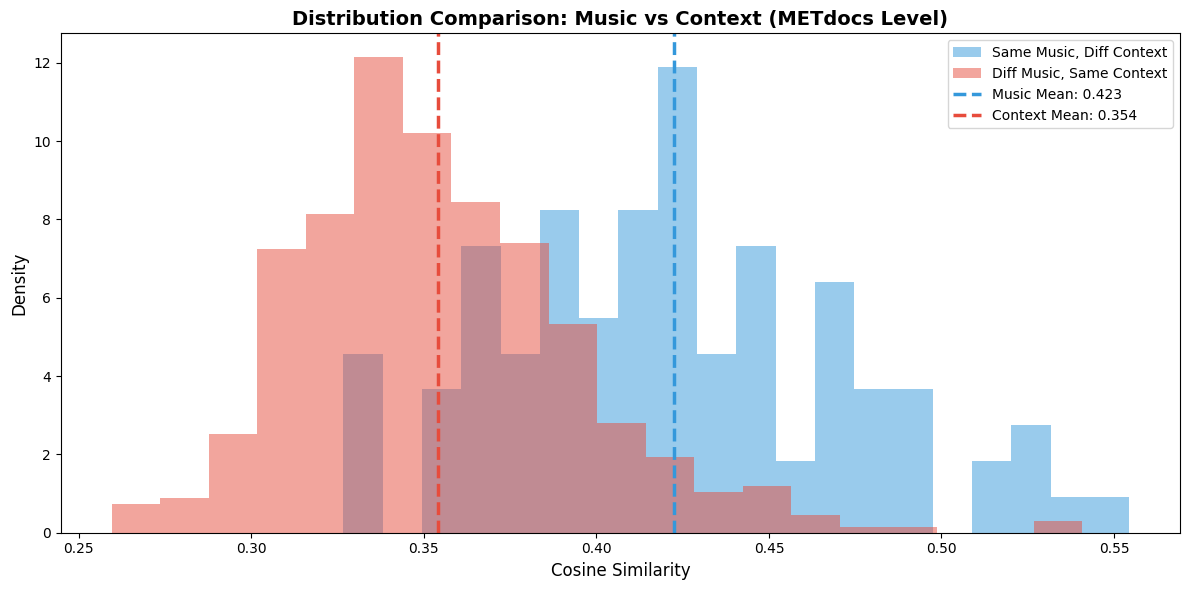

/tmp/ipython-input-3119715261.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Same Genre', 'Different Genre'])


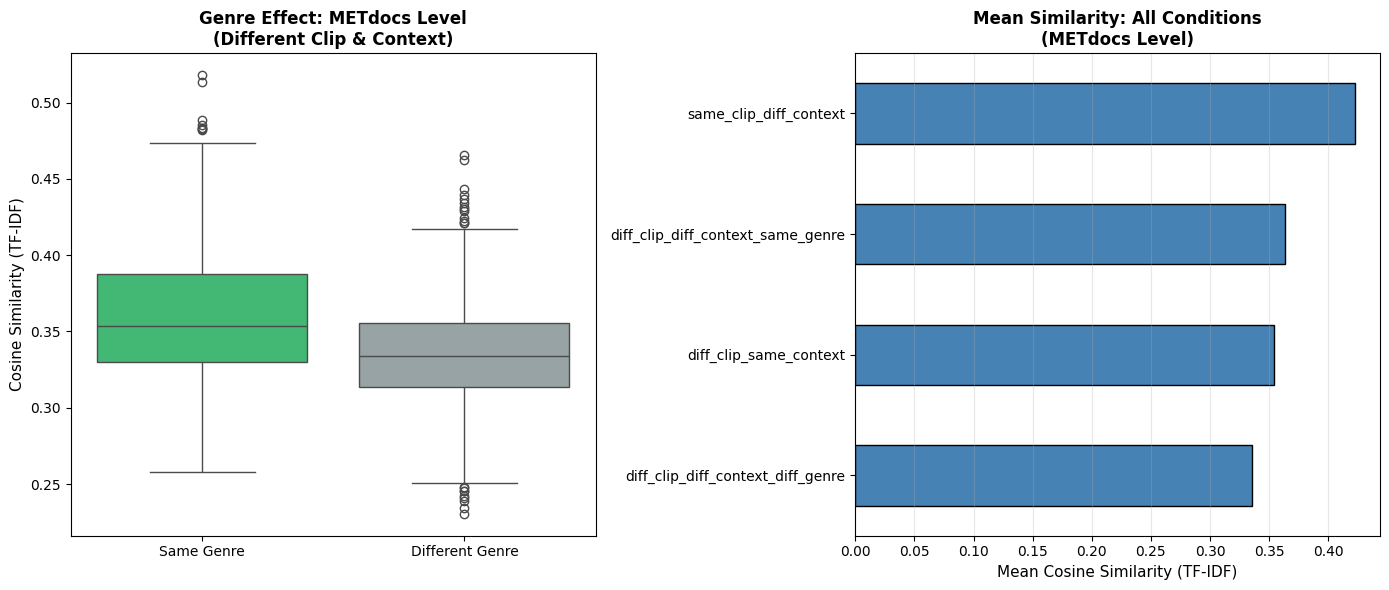

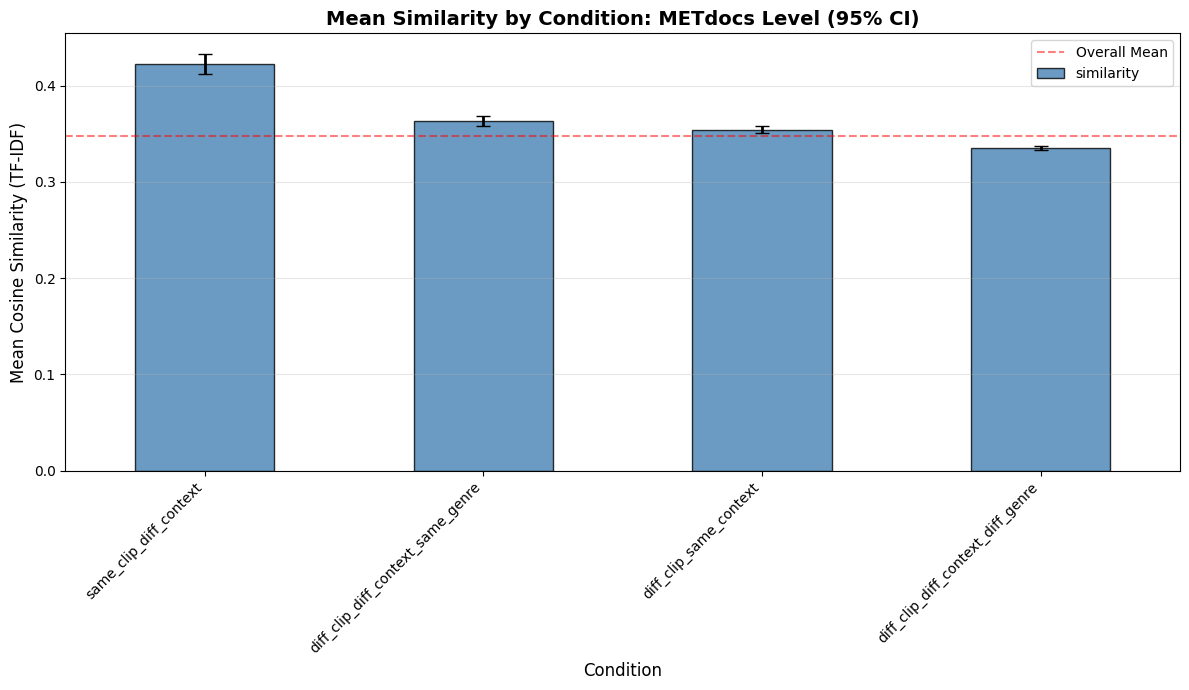

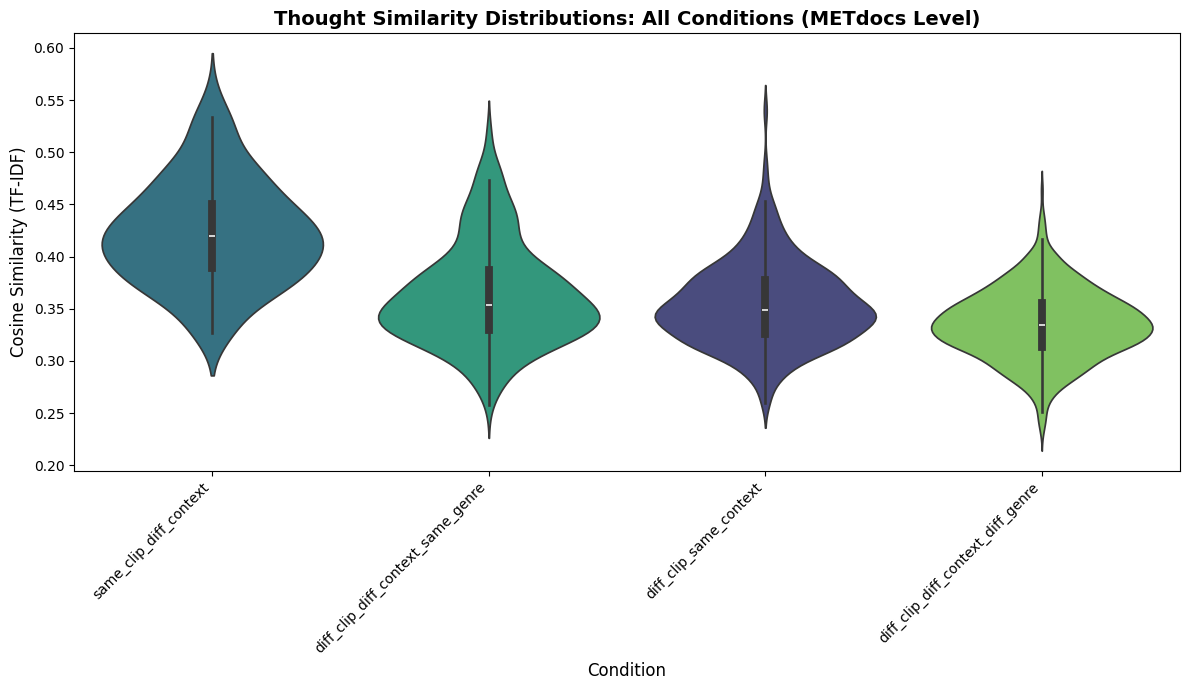

/tmp/ipython-input-3119715261.py:138: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0, ha='center')


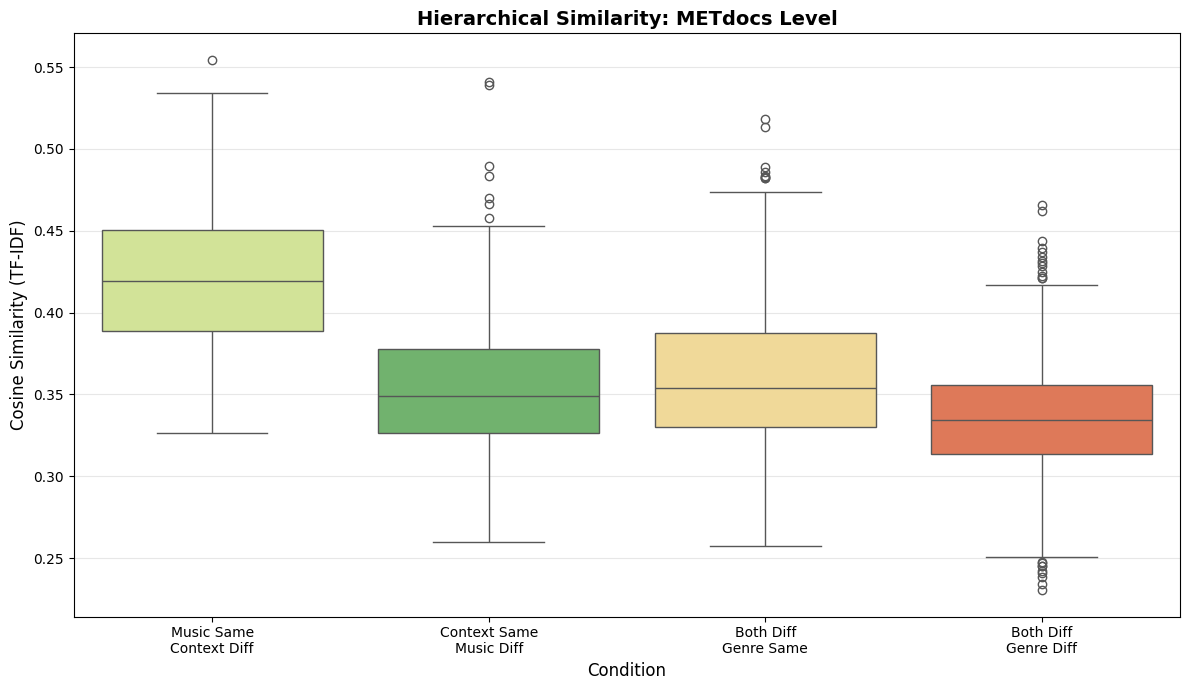

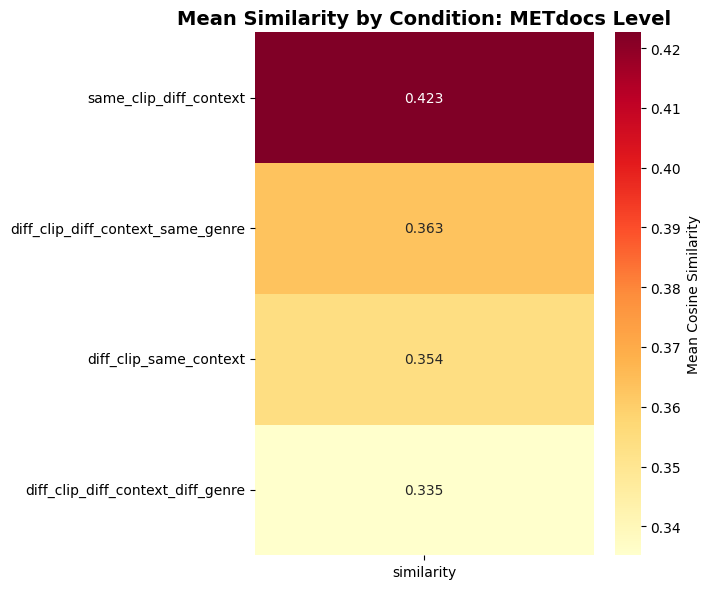

In [29]:
music_driven_docs = sim_df_docs[sim_df_docs['condition'] == 'same_clip_diff_context']['similarity']
context_driven_docs = sim_df_docs[sim_df_docs['condition'] == 'diff_clip_same_context']['similarity']

# 1. Isolated Music vs Context
fig, ax = plt.subplots(figsize=(7, 6))
comparison_data = sim_df_docs[sim_df_docs['condition'].isin([
    'same_clip_diff_context',
    'diff_clip_same_context'
])].copy()
comparison_data['condition_label'] = comparison_data['condition'].map({
    'same_clip_diff_context': 'Same Music\nDifferent Context',
    'diff_clip_same_context': 'Different Music\nSame Context'
})
sns.boxplot(data=comparison_data, x='condition_label', y='similarity', ax=ax,
            hue='condition_label', palette=['#e74c3c', '#3498db'], legend=False,
            order=['Same Music\nDifferent Context', 'Different Music\nSame Context'])
sns.stripplot(data=comparison_data, x='condition_label', y='similarity', ax=ax,
              hue='condition_label', color='black', alpha=0.3, size=4, legend=False,
              order=['Same Music\nDifferent Context', 'Different Music\nSame Context'])
ax.set_title('Isolated Music vs Context Influence (METdocs Level)',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.set_ylabel('Cosine Similarity (TF-IDF)', fontsize=12)
# ax.legend_.remove()  # Remove legend since labels are on x-axis

plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_01_music_vs_context_boxplot.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 2. Distribution comparison histogram
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(music_driven_docs, bins=20, alpha=0.5, label='Same Music, Diff Context',
        color='#3498db', density=True)
ax.hist(context_driven_docs, bins=20, alpha=0.5, label='Diff Music, Same Context',
        color='#e74c3c', density=True)
ax.axvline(music_driven_docs.mean(), color='#3498db', linestyle='--', linewidth=2.5,
           label=f'Music Mean: {music_driven_docs.mean():.3f}')
ax.axvline(context_driven_docs.mean(), color='#e74c3c', linestyle='--', linewidth=2.5,
           label=f'Context Mean: {context_driven_docs.mean():.3f}')
ax.set_xlabel('Cosine Similarity', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Distribution Comparison: Music vs Context (METdocs Level)',
             fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_04_music_vs_context_histogram.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 3. Genre effects visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

genre_comparison = sim_df_docs[sim_df_docs['condition'].isin([
    'diff_clip_diff_context_same_genre',
    'diff_clip_diff_context_diff_genre'
])]
sns.boxplot(data=genre_comparison, x='condition', y='similarity', ax=axes[0],
            hue='condition', palette=['#2ecc71', '#95a5a6'], legend=False)
axes[0].set_title('Genre Effect: METdocs Level\n(Different Clip & Context)',
                  fontsize=12, fontweight='bold')
axes[0].set_xticklabels(['Same Genre', 'Different Genre'])
axes[0].set_ylabel('Cosine Similarity (TF-IDF)', fontsize=11)
axes[0].set_xlabel('')

all_conditions_means = sim_df_docs.groupby('condition')['similarity'].mean()
all_conditions_means.sort_values(ascending=True).plot(kind='barh', ax=axes[1],
                                                       color='steelblue', edgecolor='black')
axes[1].set_title('Mean Similarity: All Conditions\n(METdocs Level)',
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Mean Cosine Similarity (TF-IDF)', fontsize=11)
axes[1].set_ylabel('')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_06_genre_effects_summary.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 4. Bar plot with means and 95% CI
fig, ax = plt.subplots(figsize=(12, 7))
means = sim_df_docs.groupby('condition')['similarity'].mean().sort_values(ascending=False)
sems = sim_df_docs.groupby('condition')['similarity'].sem()
ci95 = sems * 1.96

means.plot(kind='bar', ax=ax, yerr=ci95, capsize=5, color='steelblue',
           edgecolor='black', alpha=0.8, error_kw={'linewidth': 2})
ax.set_title('Mean Similarity by Condition: METdocs Level (95% CI)',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.set_ylabel('Mean Cosine Similarity (TF-IDF)', fontsize=12)
ax.set_xticklabels(means.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=sim_df_docs['similarity'].mean(), color='red', linestyle='--',
           alpha=0.5, label='Overall Mean')
ax.legend()
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_03_condition_means_barplot.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 5. ALL CONDITIONS comparison
fig, ax = plt.subplots(figsize=(12, 7))
condition_order = sim_df_docs.groupby('condition')['similarity'].mean().sort_values(ascending=False).index
sns.violinplot(data=sim_df_docs, x='condition', y='similarity', ax=ax, order=condition_order,
               hue='condition', palette='viridis', legend=False)
ax.set_title('Thought Similarity Distributions: All Conditions (METdocs Level)',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.set_ylabel('Cosine Similarity (TF-IDF)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_02_all_conditions_violin.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 6. HIERARCHICAL comparison
fig, ax = plt.subplots(figsize=(12, 7))
hierarchical_data = sim_df_docs[sim_df_docs['condition'].isin([
    'same_clip_diff_context',
    'diff_clip_same_context',
    'diff_clip_diff_context_same_genre',
    'diff_clip_diff_context_diff_genre'
])]

order = ['same_clip_diff_context', 'diff_clip_same_context',
         'diff_clip_diff_context_same_genre', 'diff_clip_diff_context_diff_genre']
labels = ['Music Same\nContext Diff', 'Context Same\nMusic Diff',
          'Both Diff\nGenre Same', 'Both Diff\nGenre Diff']

sns.boxplot(data=hierarchical_data, x='condition', y='similarity', ax=ax,
            order=order, hue='condition', palette='RdYlGn_r', legend=False)
ax.set_xticklabels(labels, rotation=0, ha='center')
ax.set_title('Hierarchical Similarity: METdocs Level', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition', fontsize=12)
ax.set_ylabel('Cosine Similarity (TF-IDF)', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_05_hierarchical_comparison.png',
            dpi=300, bbox_inches='tight')
plt.show()


# 7. Heatmap
fig, ax = plt.subplots(figsize=(7, 6))
condition_pivot = sim_df_docs.pivot_table(values='similarity',
                                           index='condition',
                                           aggfunc='mean').sort_values('similarity', ascending=False)
sns.heatmap(condition_pivot, annot=True, fmt='.3f', cmap='YlOrRd',
            cbar_kws={'label': 'Mean Cosine Similarity'}, ax=ax)
ax.set_title('Mean Similarity by Condition: METdocs Level', fontsize=14, fontweight='bold')
ax.set_ylabel('')
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_07_condition_heatmap.png',
            dpi=300, bbox_inches='tight')
plt.show()

#### Within-Condition Variability Analysis

Testing convergence/consistency within each condition.

Lower variability = greater convergence of thought content

In [19]:
print("\n" + "-"*70)
print("WITHIN-CONDITION VARIABILITY ANALYSIS")
print("-"*70)
print("Testing convergence/consistency within each condition")
print("Lower variability = greater convergence of thought content\n")

# Calculate coefficient of variation (CV) for each condition
condition_stats = sim_df_docs.groupby('condition')['similarity'].agg([
    ('mean', 'mean'),
    ('std', 'std'),
    ('count', 'count')
])
condition_stats['cv'] = condition_stats['std'] / condition_stats['mean']
condition_stats['se'] = condition_stats['std'] / np.sqrt(condition_stats['count'])

print("\nCondition Variability Summary:")
print(condition_stats.sort_values('cv'))

# Compare variability of key conditions
music_cv = condition_stats.loc['same_clip_diff_context', 'cv']
context_cv = condition_stats.loc['diff_clip_same_context', 'cv']

print(f"\n" + "="*70)
print("KEY FINDING: Consistency Comparison")
print("="*70)
print(f"Same Music, Different Context:")
print(f"  Mean: {condition_stats.loc['same_clip_diff_context', 'mean']:.4f}")
print(f"  SD: {condition_stats.loc['same_clip_diff_context', 'std']:.4f}")
print(f"  CV: {music_cv:.4f}")

print(f"\nDifferent Music, Same Context:")
print(f"  Mean: {condition_stats.loc['diff_clip_same_context', 'mean']:.4f}")
print(f"  SD: {condition_stats.loc['diff_clip_same_context', 'std']:.4f}")
print(f"  CV: {context_cv:.4f}")

if music_cv < context_cv:
    print(f"\n→ MUSIC produces MORE CONSISTENT thought content (lower CV)")
    print(f"   Thoughts converge more reliably when hearing same music")
else:
    print(f"\n→ CONTEXT produces MORE CONSISTENT thought content (lower CV)")
    print(f"   Thoughts converge more reliably with same framing text")

# Levene's test for equality of variances
from scipy.stats import levene

music_sims = sim_df_docs[sim_df_docs['condition'] == 'same_clip_diff_context']['similarity']
context_sims = sim_df_docs[sim_df_docs['condition'] == 'diff_clip_same_context']['similarity']

levene_stat, levene_p = levene(music_sims, context_sims)
print(f"\nLevene's test for equal variances:")
print(f"  F = {levene_stat:.3f}, p = {levene_p:.4f}")
if levene_p < 0.05:
    print("  → Variances are significantly different")
else:
    print("  → Variances are not significantly different")

# Save variability analysis
condition_stats.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_condition_variability_TFIDF.csv')



----------------------------------------------------------------------
WITHIN-CONDITION VARIABILITY ANALYSIS
----------------------------------------------------------------------
Testing convergence/consistency within each condition
Lower variability = greater convergence of thought content


Condition Variability Summary:
                                       mean       std  count        cv  \
condition                                                                
diff_clip_diff_context_diff_genre  0.335158  0.033651   1152  0.100403   
diff_clip_same_context             0.354024  0.040283    480  0.113785   
same_clip_diff_context             0.422625  0.050381     96  0.119210   
diff_clip_diff_context_same_genre  0.363182  0.048555    288  0.133694   

                                         se  
condition                                    
diff_clip_diff_context_diff_genre  0.000991  
diff_clip_same_context             0.001839  
same_clip_diff_context             0.005142 

##### Visualisations

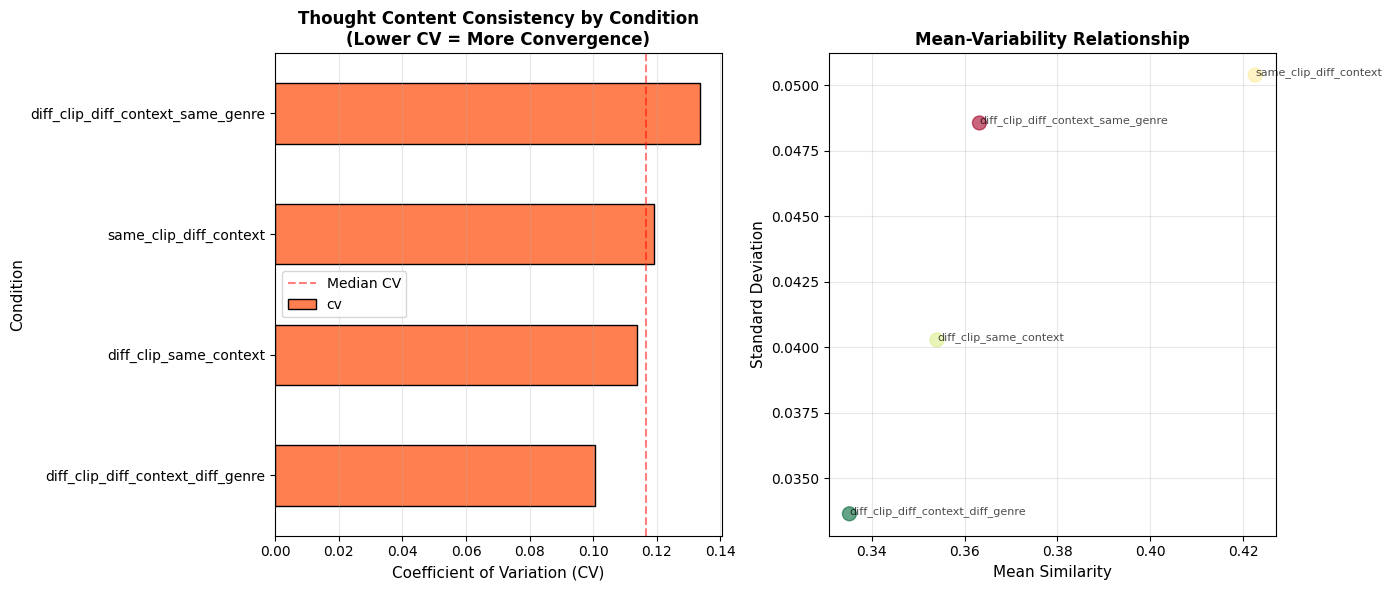

In [20]:
# CV comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: CV by condition
condition_stats.sort_values('cv').plot(kind='barh', y='cv', ax=axes[0],
                                       color='coral', edgecolor='black')
axes[0].set_xlabel('Coefficient of Variation (CV)', fontsize=11)
axes[0].set_ylabel('Condition', fontsize=11)
axes[0].set_title('Thought Content Consistency by Condition\n(Lower CV = More Convergence)',
                  fontsize=12, fontweight='bold')
axes[0].axvline(x=condition_stats['cv'].median(), color='red', linestyle='--',
                alpha=0.5, label='Median CV')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Mean vs. SD scatter
axes[1].scatter(condition_stats['mean'], condition_stats['std'],
               s=100, alpha=0.6, c=condition_stats['cv'], cmap='RdYlGn_r')
for idx, row in condition_stats.iterrows():
    axes[1].annotate(idx, (row['mean'], row['std']), fontsize=8, alpha=0.7)
axes[1].set_xlabel('Mean Similarity', fontsize=11)
axes[1].set_ylabel('Standard Deviation', fontsize=11)
axes[1].set_title('Mean-Variability Relationship', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_08_within_condition_variability.png',
            dpi=300, bbox_inches='tight')
plt.show()

#### Omnibus Test

In [21]:
print("\n\n" + "-"*70)
print("OMNIBUS TEST")
print("-"*70)

conditions_list = sim_df_docs['condition'].unique()
groups = [sim_df_docs[sim_df_docs['condition'] == cond]['similarity'] for cond in conditions_list]
f_stat, p_anova = stats.f_oneway(*groups)

print(f"\nOne-way ANOVA across all {len(conditions_list)} conditions:")
print(f"F({len(conditions_list)-1}, {len(sim_df_docs)-len(conditions_list)}) = {f_stat:.3f}, p = {p_anova:.4e}")

if p_anova < 0.001:
    print("→ Conditions are HIGHLY significantly different overall")
else:
    print("→ Conditions show significant differences" if p_anova < 0.05 else "→ No significant differences")



----------------------------------------------------------------------
OMNIBUS TEST
----------------------------------------------------------------------

One-way ANOVA across all 4 conditions:
F(3, 2012) = 180.804, p = 8.5808e-104
→ Conditions are HIGHLY significantly different overall


#### SUMMARY: Condition means, Binaries, Combinations


In [22]:
print("\n\n" + "-"*70)
print("SUMMARY TABLES")
print("-"*70)

# Condition means ranking
print("\nCondition means (ranked):")
condition_means = sim_df_docs.groupby('condition')['similarity'].agg(['mean', 'std', 'count'])
condition_means = condition_means.sort_values('mean', ascending=False)
print(condition_means)

# Binary comparisons summary
print("\n\nBinary Comparisons Summary (ranked by effect size):")
binary_df = pd.DataFrame(binary_comparisons)
binary_df = binary_df.sort_values('d', key=abs, ascending=False)
print(binary_df[['comparison', 'mean_same', 'mean_diff', 'diff', 'd', 'p', 'sig']])

# Combined comparisons summary
print("\n\nCombined Condition Comparisons (ranked by effect size):")
combined_df = pd.DataFrame(combined_comparisons)
combined_df = combined_df.sort_values('d', key=abs, ascending=False)
print(combined_df[['comparison', 'mean1', 'mean2', 'diff', 'd', 'p', 'sig']])


# SAVE RESULTS
# ---------------------------------------------------------------------------
# Save all comparisons
binary_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_binary_comparisons_TFIDF.csv',
                 index=False)
combined_df.to_csv('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_combined_comparisons_TFIDF.csv',
                   index=False)

print("\n\nStatistical comparison results saved")



----------------------------------------------------------------------
SUMMARY TABLES
----------------------------------------------------------------------

Condition means (ranked):
                                       mean       std  count
condition                                                   
same_clip_diff_context             0.422625  0.050381     96
diff_clip_diff_context_same_genre  0.363182  0.048555    288
diff_clip_same_context             0.354024  0.040283    480
diff_clip_diff_context_diff_genre  0.335158  0.033651   1152


Binary Comparisons Summary (ranked by effect size):
                          comparison  mean_same  mean_diff      diff  \
0        Same Clip vs Different Clip   0.422625   0.344078  0.078547   
2      Same Genre vs Different Genre   0.377824   0.338442  0.039382   
1  Same Context vs Different Context   0.354024   0.345879  0.008145   

          d             p  sig  
0  1.734315  3.341884e-72  ***  
2  0.864870  1.262447e-72  ***  
1  0.1

##### Visualisations: Effect size comparisons

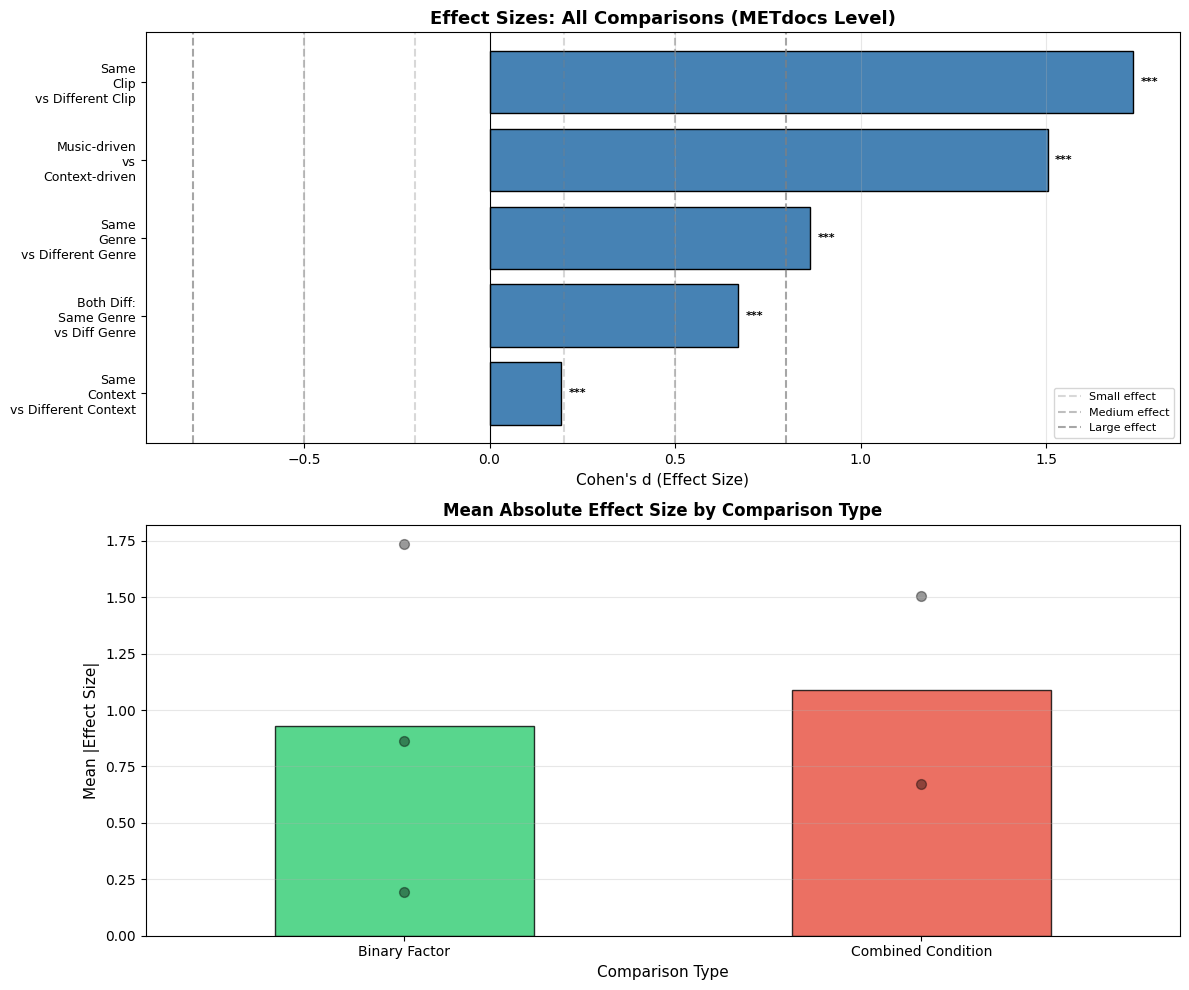

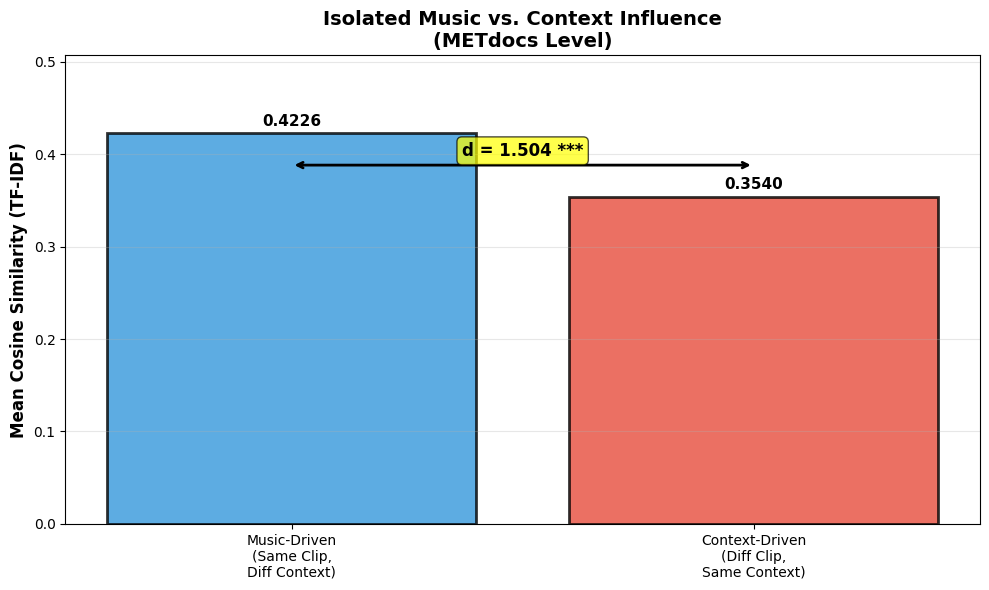

In [23]:
# Combine all effect sizes from binary and combined comparisons
all_effects = []

# Binary comparisons
for comp in binary_comparisons:
    all_effects.append({
        'Comparison': comp['comparison'].replace('Same ', 'Same\n').replace(' vs', '\nvs'),
        'Effect_Size': comp['d'],
        'Type': 'Binary Factor',
        'Significance': comp['sig']
    })

# Combined comparisons (filtered to exclude same_clip_same_context)
for comp in combined_comparisons:
    label = comp['comparison']

    # Skip comparisons involving same_clip_same_context
    if 'Same Context & Same Clip' in label or 'Same Clip & Same Context' in label:
        continue

    # Shorten remaining labels
    if 'Same Clip, Different Context vs Different Clip, Same Context' in label:
        label = 'Music-driven\nvs\nContext-driven'
    elif 'Both Different' in label:
        label = 'Both Diff:\nSame Genre\nvs Diff Genre'

    all_effects.append({
        'Comparison': label,
        'Effect_Size': comp['d'],
        'Type': 'Combined Condition',
        'Significance': comp['sig']
    })

effects_df = pd.DataFrame(all_effects)

# Create comprehensive effect size plot
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: All effect sizes ranked
effects_sorted = effects_df.sort_values('Effect_Size', ascending=True)
colors = ['red' if sig == 'n.s.' else 'steelblue' for sig in effects_sorted['Significance']]

axes[0].barh(range(len(effects_sorted)), effects_sorted['Effect_Size'],
            color=colors, edgecolor='black')
axes[0].set_yticks(range(len(effects_sorted)))
axes[0].set_yticklabels(effects_sorted['Comparison'], fontsize=9)
axes[0].set_xlabel("Cohen's d (Effect Size)", fontsize=11)
axes[0].set_title('Effect Sizes: All Comparisons (METdocs Level)',
                 fontsize=13, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[0].axvline(x=0.2, color='gray', linestyle='--', alpha=0.3, label='Small effect')
axes[0].axvline(x=0.5, color='gray', linestyle='--', alpha=0.5, label='Medium effect')
axes[0].axvline(x=0.8, color='gray', linestyle='--', alpha=0.7, label='Large effect')
axes[0].axvline(x=-0.2, color='gray', linestyle='--', alpha=0.3)
axes[0].axvline(x=-0.5, color='gray', linestyle='--', alpha=0.5)
axes[0].axvline(x=-0.8, color='gray', linestyle='--', alpha=0.7)
axes[0].legend(loc='lower right', fontsize=8)
axes[0].grid(axis='x', alpha=0.3)

# Add significance indicators
for i, (idx, row) in enumerate(effects_sorted.iterrows()):
    if row['Significance'] != 'n.s.':
        axes[0].text(row['Effect_Size'] + 0.02, i, row['Significance'],
                    va='center', fontsize=8, fontweight='bold')

# Plot 2: Binary vs Combined comparison types
effects_by_type = effects_df.groupby('Type')['Effect_Size'].apply(lambda x: x.abs().mean())
effects_by_type.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'],
                     edgecolor='black', alpha=0.8)
axes[1].set_title('Mean Absolute Effect Size by Comparison Type',
                 fontsize=12, fontweight='bold')
axes[1].set_ylabel('Mean |Effect Size|', fontsize=11)
axes[1].set_xlabel('Comparison Type', fontsize=11)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(axis='y', alpha=0.3)

# Add individual points
for comp_type in effects_df['Type'].unique():
    type_data = effects_df[effects_df['Type'] == comp_type]['Effect_Size'].abs()
    x_pos = 0 if comp_type == 'Binary Factor' else 1
    axes[1].scatter([x_pos] * len(type_data), type_data, alpha=0.4, s=50, color='black')

plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_10_effect_sizes_comprehensive.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Create a focused comparison for the PRIMARY research question
fig, ax = plt.subplots(figsize=(10, 6))

# Get primary comparison effect
primary_effect = combined_df[combined_df['comparison'].str.contains('Same Clip, Different Context')].iloc[0]

# Create bar chart
categories = ['Music-Driven\n(Same Clip,\nDiff Context)',
              'Context-Driven\n(Diff Clip,\nSame Context)']
means = [primary_effect['mean1'], primary_effect['mean2']]
colors_primary = ['#3498db', '#e74c3c']

bars = ax.bar(categories, means, color=colors_primary, edgecolor='black', linewidth=2, alpha=0.8)

# Add value labels
for i, (bar, mean) in enumerate(zip(bars, means)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{mean:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add effect size annotation
mid_point = (means[0] + means[1]) / 2
ax.annotate('', xy=(0, mid_point), xytext=(1, mid_point),
            arrowprops=dict(arrowstyle='<->', lw=2, color='black'))
ax.text(0.5, mid_point + 0.01, f"d = {primary_effect['d']:.3f} {primary_effect['sig']}",
        ha='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax.set_ylabel('Mean Cosine Similarity (TF-IDF)', fontsize=12, fontweight='bold')
ax.set_title('Isolated Music vs. Context Influence\n(METdocs Level)',
             fontsize=14, fontweight='bold')
ax.set_ylim([0, max(means) * 1.2])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_11_primary_question_focused.png',
            dpi=300, bbox_inches='tight')
plt.show()

### SUMMARY

In [24]:
print("\n" + "="*70)
print("COMPREHENSIVE RESULTS SUMMARY (METdocs TF-IDF Analysis)")
print("="*70)

# Get key statistics
music_driven_summary = sim_df_docs[sim_df_docs['condition'] == 'same_clip_diff_context']['similarity']
context_driven_summary = sim_df_docs[sim_df_docs['condition'] == 'diff_clip_same_context']['similarity']

music_mean = music_driven_summary.mean()
context_mean = context_driven_summary.mean()
diff = music_mean - context_mean
percent_diff = (diff / context_mean) * 100

t_stat, p_value = stats.ttest_ind(music_driven_summary, context_driven_summary)
pooled_std = np.sqrt((music_driven_summary.std()**2 + context_driven_summary.std()**2) / 2)
effect_size = diff / pooled_std

# Calculate confidence intervals
music_ci = stats.t.interval(0.95, len(music_driven_summary)-1,
                            loc=music_mean,
                            scale=stats.sem(music_driven_summary))
context_ci = stats.t.interval(0.95, len(context_driven_summary)-1,
                              loc=context_mean,
                              scale=stats.sem(context_driven_summary))

print("\n" + "-"*70)
print("1. PRIMARY RESEARCH QUESTION: Does Music or Context Drive Similarity?")
print("-"*70)

print(f"\nMUSIC-DRIVEN (Same Clip, Different Context):")
print(f"  Mean similarity: {music_mean:.4f}")
print(f"  SD: {music_driven_summary.std():.4f}")
print(f"  95% CI: [{music_ci[0]:.4f}, {music_ci[1]:.4f}]")
print(f"  N pairs: {len(music_driven_summary)}")

print(f"\nCONTEXT-DRIVEN (Different Clip, Same Context):")
print(f"  Mean similarity: {context_mean:.4f}")
print(f"  SD: {context_driven_summary.std():.4f}")
print(f"  95% CI: [{context_ci[0]:.4f}, {context_ci[1]:.4f}]")
print(f"  N pairs: {len(context_driven_summary)}")

print(f"\nSTATISTICAL COMPARISON:")
print(f"  Difference: {diff:.4f} ({percent_diff:+.1f}%)")
print(f"  t({len(music_driven_summary) + len(context_driven_summary) - 2}) = {t_stat:.3f}")
print(f"  p = {p_value:.4f}")
print(f"  Cohen's d = {effect_size:.3f}")

# Effect size interpretation
if abs(effect_size) < 0.2:
    effect_interp = "NEGLIGIBLE"
elif abs(effect_size) < 0.5:
    effect_interp = "SMALL"
elif abs(effect_size) < 0.8:
    effect_interp = "MEDIUM"
else:
    effect_interp = "LARGE"

print(f"  Effect size magnitude: {effect_interp}")

print(f"\n{'='*70}")
if p_value < 0.001:
    sig_level = "p < .001 ***"
elif p_value < 0.01:
    sig_level = "p < .01 **"
elif p_value < 0.05:
    sig_level = "p < .05 *"
else:
    sig_level = "n.s."

if abs(diff) < 0.01 and p_value >= 0.05:
    print("FINDING: Music and Context have EQUIVALENT influence on thought similarity")
    print(f"         at the document level ({sig_level})")
elif music_mean > context_mean and p_value < 0.05:
    print("FINDING: MUSIC drives thought similarity MORE than contextual framing")
    print(f"         Thoughts are {percent_diff:.1f}% more similar when hearing the same")
    print(f"         music (regardless of context) than when given the same context")
    print(f"         (regardless of music) ({sig_level}, d = {effect_size:.3f})")
elif context_mean > music_mean and p_value < 0.05:
    print("FINDING: CONTEXTUAL FRAMING drives thought similarity MORE than music")
    print(f"         Thoughts are {abs(percent_diff):.1f}% more similar when given the same")
    print(f"         context (regardless of music) than when hearing the same music")
    print(f"         (regardless of context) ({sig_level}, d = {effect_size:.3f})")
else:
    print("FINDING: No significant difference between music and context influence")
    print(f"         ({sig_level})")
print(f"{'='*70}")

# Binary effects summary
print("\n" + "-"*70)
print("2. BINARY FACTOR EFFECTS (Same vs. Different)")
print("-"*70)

binary_summary = []
for comp in [clip_comp, context_comp, genre_comp]:
    factor_name = comp['comparison'].split(' vs ')[0].replace('Same ', '')
    binary_summary.append({
        'Factor': factor_name,
        'Effect_d': comp['d'],
        'Mean_Diff': comp['diff'],
        'p_value': comp['p'],
        'sig': comp['sig']
    })

binary_summary_df = pd.DataFrame(binary_summary).sort_values('Effect_d', key=abs, ascending=False)

print("\nRanked by effect size:")
for i, row in binary_summary_df.iterrows():
    print(f"  {i+1}. {row['Factor']}: d = {row['Effect_d']:.3f}, Δ = {row['Mean_Diff']:.4f} {row['sig']}")

print(f"\n→ {binary_summary_df.iloc[0]['Factor']} has the STRONGEST effect on thought similarity")
print(f"→ {binary_summary_df.iloc[-1]['Factor']} has the WEAKEST effect")

# Genre effects
print("\n" + "-"*70)
print("3. GENRE EFFECTS (When Clip and Context Both Differ)")
print("-"*70)

same_genre_mean = sim_df_docs[sim_df_docs['condition'] == 'diff_clip_diff_context_same_genre']['similarity'].mean()
diff_genre_mean = sim_df_docs[sim_df_docs['condition'] == 'diff_clip_diff_context_diff_genre']['similarity'].mean()
genre_effect_diff = same_genre_mean - diff_genre_mean

print(f"\nSame genre: M = {same_genre_mean:.4f}")
print(f"Different genre: M = {diff_genre_mean:.4f}")
print(f"Difference: {genre_effect_diff:.4f}")

if genre_comp['sig'] != 'n.s.':
    print(f"\n→ Genre creates semantic coherence even without shared clip or context")
    print(f"  ({genre_comp['sig']}, d = {genre_comp['d']:.3f})")
else:
    print(f"\n→ Genre does NOT significantly affect similarity when other factors differ")


# Additive effects
print("\n" + "-"*70)
print("4. ADDITIVE EFFECTS")
print("-"*70)

music_only = music_mean
context_only = context_mean
neither = sim_df_docs[sim_df_docs['condition'].isin([
    'diff_clip_diff_context_same_genre',
    'diff_clip_diff_context_diff_genre'
])]['similarity'].mean()

print(f"\nHierarchical similarity levels:")
print(f"  Both same (clip + context): [same document - excluded]")
print(f"  Music same only: {music_only:.4f}")
print(f"  Context same only: {context_only:.4f}")
print(f"  Both different: {neither:.4f}")

print(f"\nNOTE: Cannot test interaction at document level")
print(f"      Same clip + same context = same document (similarity = 1.0)")
print(f"      This is a limitation of document-level TF-IDF analysis")

# Save comprehensive summary (excluding same_clip_same_context)
summary_output = {
    'primary_comparison': {
        'music_mean': music_mean,
        'context_mean': context_mean,
        'difference': diff,
        'percent_difference': percent_diff,
        't_statistic': t_stat,
        'p_value': p_value,
        'cohens_d': effect_size,
        'effect_magnitude': effect_interp,
        'n_music': len(music_driven_summary),
        'n_context': len(context_driven_summary)
    },
    'binary_effects': binary_summary_df.to_dict('records'),
    'genre_effects': {
        'same_genre_mean': same_genre_mean,
        'diff_genre_mean': diff_genre_mean,
        'difference': genre_effect_diff,
        'cohens_d': genre_comp['d'],
        'p_value': genre_comp['p']
    },
    'hierarchical_levels': {
        'music_only': music_only,
        'context_only': context_only,
        'both_different': neither,
        'note': 'both_same excluded: same document at this level'
    },
    'limitations': {
        'document_level_constraint': 'Cannot test same_clip_same_context (= same document)',
        'interaction_test': 'Not possible at document aggregation level'
    }
}

import json
with open('/content/context-framed-listening/NLP_outputs/TFIDF/METdocs_comprehensive_summary.json', 'w') as f:
    json.dump(summary_output, f, indent=2)


COMPREHENSIVE RESULTS SUMMARY (METdocs TF-IDF Analysis)

----------------------------------------------------------------------
1. PRIMARY RESEARCH QUESTION: Does Music or Context Drive Similarity?
----------------------------------------------------------------------

MUSIC-DRIVEN (Same Clip, Different Context):
  Mean similarity: 0.4226
  SD: 0.0504
  95% CI: [0.4124, 0.4328]
  N pairs: 96

CONTEXT-DRIVEN (Different Clip, Same Context):
  Mean similarity: 0.3540
  SD: 0.0403
  95% CI: [0.3504, 0.3576]
  N pairs: 480

STATISTICAL COMPARISON:
  Difference: 0.0686 (+19.4%)
  t(574) = 14.567
  p = 0.0000
  Cohen's d = 1.504
  Effect size magnitude: LARGE

FINDING: MUSIC drives thought similarity MORE than contextual framing
         Thoughts are 19.4% more similar when hearing the same
         music (regardless of context) than when given the same context
         (regardless of music) (p < .001 ***, d = 1.504)

----------------------------------------------------------------------
2. 